# 1.0 Imports

### 1.1 Libs

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import sweetviz as sv
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from plotly import express as px
from sklearn import cluster as c
from sklearn import metrics as mt
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### 1.2 Funções

In [ ]:
def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

### 1.3 Loading data

In [2]:
df_raw = pd.read_csv('../datasets/ecommerce.csv', encoding='unicode_escape', low_memory=False)

In [3]:
df_raw

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0        29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2        29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
4        29-Nov-16       3.39     17850.0  United Kingdom         NaN  
...            ...        ...         ...             ...         ...  
541904    7-Dec-17       0.85     12680.0          France         NaN  
541905    7-Dec-17       2.10     12680.0          France         NaN  
541906    7-Dec-17       4.15     12680.0          France         NaN  
541907    7-Dec-17       4.15     12680.0          France         NaN  
541908    7-Dec-17       4.95     12680.0          France         NaN  

[541909 rows x 9 columns]

# 2.0 Descrição dos dados

In [3]:
df1 = df_raw.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


### 2.1 Renomear colunas

In [4]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id',
           'country', 'unnamed']

df1.columns = cols_new

### 2.2 Change types

In [5]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

### 2.3 Check NA

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
unnamed         541909
dtype: int64

### 2.4 Linhas duplicadas

In [9]:
linhas_duplicadas = df1[df1.duplicated(keep=False)].index
print("Linhas duplicadas:")
print(linhas_duplicadas)

Linhas duplicadas:
Index([   485,    489,    494,    517,    521,    527,    537,    539,    548,
          555,
       ...
       541644, 541646, 541655, 541656, 541666, 541675, 541689, 541692, 541699,
       541701],
      dtype='int64', length=10149)


In [10]:
df1.iloc[[485,489,494,517,521,527,537,539,548,555]]

invoice_no stock_code                        description  quantity  \
485     536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
489     536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
494     536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
517     536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
521     536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
527     536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
537     536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539     536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
548     536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
555     536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

    invoice_date  unit_price  customer_id         country  unnamed  
485   2016-11-29        4.95      17908.0  United Kingdom      NaN  
489   2016-11-29        2.10      17908.0  United Kingdom      NaN  
494   2016-11-29        1.25      17908.0  United Kingdom      NaN  
517   2016-11-29        1.25      17908.0  United Kingdom      NaN  
521   2016-11-29        2.95      17908.0  United Kingdom      NaN  
527   2016-11-29        2.10      17908.0  United Kingdom      NaN  
537   2016-11-29        2.95      17908.0  United Kingdom      NaN  
539   2016-11-29        4.95      17908.0  United Kingdom      NaN  
548   2016-11-29        2.95      17920.0  United Kingdom      NaN  
555   2016-11-29        2.95      17920.0  United Kingdom      NaN

In [6]:
# eliminando linhas duplicadas
df1 = df1.drop_duplicates()

In [7]:
# eliminando coluna "unnamed"
df1.drop('unnamed', axis=1, inplace=True)

In [8]:
# 'resetando' os indices do dataframe
df1 = df1.reset_index(drop=True)

In [14]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
country              0
dtype: int64

### 2.5 Fillout NA

In [9]:
# o invoice_no é o numero da transação. para customer_id NaN, o invoice_no é o mesmo (para um conjunto)
# poderia associar um customer_id para as linhas que possuem o mesmo invoice_no

# Identificar os invoice_no únicos com NaN em customer_id
invoice_nan = df1[df1['customer_id'].isna()]['invoice_no'].unique()

# Criar valores únicos para cada grupo de invoice_no
invoice_value = {invoice: 20000 + i for i, invoice in enumerate(invoice_nan)}

# Substituir os NaN em customer_id 
df1['customer_id'] = df1.apply(lambda x: invoice_value[x['invoice_no']] if pd.isna(x['customer_id']) else x['customer_id'], axis=1)

In [10]:
# de maneira similar ao que foi feito para o invoice_no, agora para o description

# Criar um dicionário com a descrição para cada stock_code, sem incluir os NaN
stock = df1.dropna(subset=['description']).groupby('stock_code')['description'].first().to_dict()

# Substituir os NaN em description
df1['description'] = df1.apply(
    lambda x: stock.get(x['stock_code'], "nao-disponivel")
    if pd.isna(x['description']) else x['description'], axis=1)

In [11]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [12]:
df1[df1['description'] == 'nao-disponivel'].count()

invoice_no      112
stock_code      112
description     112
quantity        112
invoice_date    112
unit_price      112
customer_id     112
country         112
dtype: int64

### 2.6 Descriptive Statistics

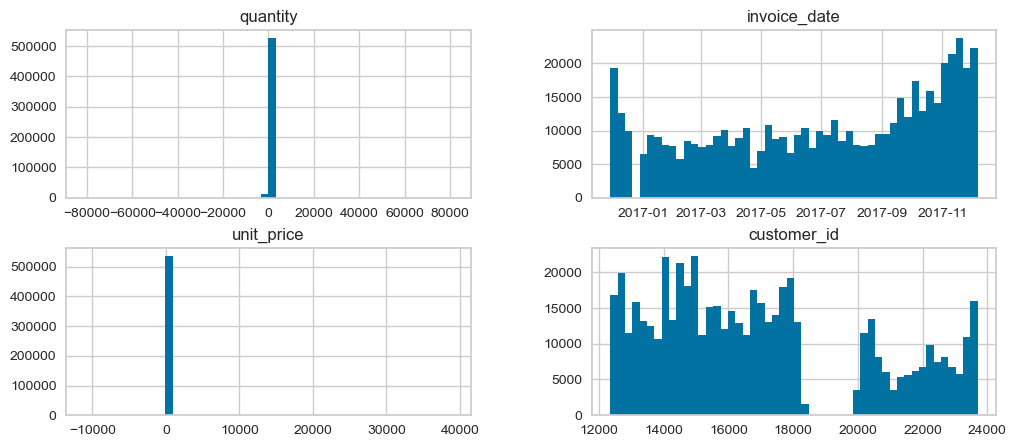

In [19]:
df1.hist(bins=50, figsize=(12,5));

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude =['int64', 'float64', 'datetime64[ns]'])

### 2.6.1 Numerical Attributes

In [21]:
stat_desc = df1.describe().T
stat_desc

count                           mean                  min  \
quantity      536640.0                       9.620043             -80995.0   
invoice_date    536640  2017-07-01 19:22:15.670840832  2016-11-29 00:00:00   
unit_price    536640.0                       4.632661            -11062.06   
customer_id   536640.0                   16948.911963              12346.0   

                              25%                  50%                  75%  \
quantity                      1.0                  3.0                 10.0   
invoice_date  2017-03-26 00:00:00  2017-07-17 00:00:00  2017-10-16 00:00:00   
unit_price                   1.25                 2.08                 4.13   
customer_id               14367.0              16255.0              20014.0   

                              max          std  
quantity                  80995.0    219.13036  
invoice_date  2017-12-07 00:00:00          NaN  
unit_price                38970.0    97.233208  
customer_id               23709.0  3291.353325

In [ ]:
# necessário investigar as quantidades negativas e o unit_price igual a zero

### 2.6.2 Categorical Attributes

##### **invoice number**

In [ ]:
# alguns invoice_no (que deveriam ser inteiros) apresentam letras

In [22]:
# problema: temos invoice com letras e números
# identificação:
df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
print('Total number of invoices: {}'.format(len(df_letter_invoice)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoice[df_letter_invoice['quantity'] < 0])))

Total number of invoices: 9254
Total number of negative quantity: 9251


##### **stock code**

In [23]:
# checando stock_code que apresentam apenas caracteres:
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z\s]+$', x))), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm',
       'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [ ]:
# remover stock_code(com letras)

##### **description**

In [24]:
df1['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
# remover coluna description

##### **country**

In [25]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [26]:
df1['country'].value_counts(normalize=True).head()

country
United Kingdom    0.913646
Germany           0.017665
France            0.015916
EIRE              0.015250
Spain             0.004711
Name: proportion, dtype: float64

In [27]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

country  customer_id
36  United Kingdom         7587
14         Germany           95
13          France           90
10            EIRE           44
31           Spain           31

# 3.0 Filtragem de variáveis

In [14]:
df2 = df1.copy()

In [15]:
# --- Numerical attributes ---
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# --- Categorical attributes ---
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK', 'C2'])]

df2 = df2.drop(columns='description', axis=1)

df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

# eliminando as linhas referentes a valores 'estranhos' de qtde_returns:
df2 = df2[~((df2['invoice_no'] == '581483') | (df2['invoice_no'] == 'C581484'))]  # referente a customer_id=16446
df2 = df2[~((df2['invoice_no'] == '541431') | (df2['invoice_no'] == 'C541433'))]  # referente a customer_id=12346
df2 = df2[~((df2['invoice_no'] == '540815') | (df2['invoice_no'] == 'C550456'))]  # referente a customer_id=15749

df2_return = df2.loc[df1['quantity'] < 0, :]  # produtos retornados
df2_purchase = df2.loc[df1['quantity'] >= 0, :]  # produtos comprados

In [ ]:
# para a variável 'quantity', linhas com valores negativos foram consideradas como sendo produtos retornados pelo 
# cliente ou pedidos cancelados

# 4.0 Feature Engineering

In [16]:
df3 = df2.copy()

### 4.1 Feature Creation

In [17]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

In [ ]:
# A segmentação dos clientes será 'baseada' no método RFM - uma ferramenta de segmentação de clientes que analisa
# o comportamento de compra baseado em três critérios: Recência, Frequência e Valor Monetário.
# Recência (R): o tempo decorrido desde a última compra do cliente. 
# Frequência (F): medida do número de compras realizadas por um cliente em um período específico.  
# Valor Monetário (M): o total gasto por um cliente. 

# Assim, como a tabela de dados não contém essas variáveis, vamos calculá-las:

##### **4.1.1 Gross Revenue**

In [18]:
# monetary (faturamento) = quantity*price --> soma produtos comprados - soma produtos retornados 
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

customer_id      0
gross_revenue    0
dtype: int64

##### **4.1.2 Recency - Days from last purchase**

In [19]:
# recency (last day purchase)
df_recency = df2_purchase[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days # em relação à mais recente data do dataframe
df_recency = df_recency[['customer_id', 'recency_days']].copy() # pegando as colunas de interesse
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue     0
recency_days     67
dtype: int64

In [ ]:
# a diferença 67 se refere à diferença entre (df_ref - df_purchase(agrupado por customer_id)), 
# lembrando que 'stock_code'='BANK CHARGES' também foram eliminados do dataframe

##### **4.1.3 Frequency purchase**

In [20]:
df_aux = (df2[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .agg(max_ = ('invoice_date', max),
                                                                 min_ = ('invoice_date', min),
                                                                 days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1),
                                                                 buy_ = ('invoice_no', 'count')).reset_index())

df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1)
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue     0
recency_days     67
frequency         0
dtype: int64

##### **4.1.4 Quantidade de produtos retornados**

In [21]:
df_prod_return = df2_return[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_prod_returns'})
df_prod_return['qtde_prod_returns'] = df_prod_return['qtde_prod_returns'].abs()

df_ref = pd.merge(df_ref, df_prod_return, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_prod_returns'].isna(), 'qtde_prod_returns'] = 0  # preenche os valores nan com zero
df_ref.isna().sum()

customer_id           0
gross_revenue         0
recency_days         67
frequency             0
qtde_prod_returns     0
dtype: int64

In [ ]:
# O número de devoluções do ciclo 4 foi alterado para quantidade de produtos devolvidos (retornados)

##### **4.1.5 Número de pedidos (invoices)** 

In [22]:
df_invoices = (df2_purchase.loc[:,['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id')
                                                                .count().reset_index()
                                                                .rename(columns={'invoice_no':'qtde_invoices'}))
df_ref = pd.merge(df_ref, df_invoices, on='customer_id', how='left')
df_ref.isna().sum()

customer_id           0
gross_revenue         0
recency_days         67
frequency             0
qtde_prod_returns     0
qtde_invoices        67
dtype: int64

##### **4.1.6 Quantidade de produtos comprados**

In [23]:
df_products = (df2_purchase.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index()
                                                               .rename(columns={'quantity':'qtde_products'}))
df_ref = pd.merge(df_ref, df_products, on='customer_id', how='left')
df_ref.isna().sum()

customer_id           0
gross_revenue         0
recency_days         67
frequency             0
qtde_prod_returns     0
qtde_invoices        67
qtde_products        67
dtype: int64

##### **4.1.7 Número de devoluções feitas**

In [24]:
# número de devoluções feitas independente que quantos produtos foram devolvidos
df_return = (df2_return.loc[:,['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id')
                                                            .count().reset_index()
                                                            .rename(columns={'invoice_no':'qtde_returns'}))
df_ref = pd.merge(df_ref, df_return, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0  # preenche os valores nan com zero
df_ref.isna().sum()

customer_id           0
gross_revenue         0
recency_days         67
frequency             0
qtde_prod_returns     0
qtde_invoices        67
qtde_products        67
qtde_returns          0
dtype: int64

##### **4.1.8 Quantidade total de produtos comprados**

In [25]:
# quantidade total = produtos comprados - produtos devolvidos
df_ref['qtde_prod_total'] = df_ref['qtde_products'] - df_ref['qtde_prod_returns']
df_ref.isna().sum()

customer_id           0
gross_revenue         0
recency_days         67
frequency             0
qtde_prod_returns     0
qtde_invoices        67
qtde_products        67
qtde_returns          0
qtde_prod_total      67
dtype: int64

# 5.0 EDA - Exploratory Data Analysis

In [26]:
df4 = df_ref.copy()
df4 = df_ref.dropna()
df4.isna().sum()

customer_id          0
gross_revenue        0
recency_days         0
frequency            0
qtde_prod_returns    0
qtde_invoices        0
qtde_products        0
qtde_returns         0
qtde_prod_total      0
dtype: int64

In [27]:
df4.shape

(5694, 9)

### 5.1 **Análise Univariada**

In [28]:
report = sv.analyze(df4)
report.show_html("report_v2.html")

                                             |                                             | [  0%]   00:00 ->…

Report report_v2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# o arquivo report_v2.html apresenta análises estatísticas das variáveis presentes no dataframe e criadas na seção 4.

#### 5.1.1 **gross revenue**

In [29]:
df4.sort_values('gross_revenue', ascending=False).head()

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
1014      14646.0      278778.02           1.0   0.206215              288.0   
490       18102.0      259657.30           0.0   0.163043                0.0   
432       17450.0      189575.53           8.0   0.136111              952.0   
66        14911.0      132893.24           1.0   0.651475             3332.0   
1147      12415.0      123638.18          24.0   0.076433              427.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
1014           72.0       196844.0           1.0         196556.0  
490            60.0        64124.0           0.0          64124.0  
432            46.0        69973.0           3.0          69021.0  
66            199.0        80238.0          44.0          76906.0  
1147           20.0        77373.0           4.0          76946.0

In [40]:
df4.sort_values('gross_revenue', ascending=True).head()

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
16        17548.0        -141.48         233.0   0.019108              190.0   
132       16546.0         -95.93         290.0   0.036145              852.0   
4771      13364.0           0.00          71.0   0.333333               71.0   
4585      16878.0           0.00          84.0   0.032787               12.0   
4570      14557.0           0.00          85.0   0.090909              510.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
16              1.0           58.0           2.0           -132.0  
132             2.0          549.0           1.0           -303.0  
4771            1.0           71.0           1.0              0.0  
4585            1.0           12.0           1.0              0.0  
4570            1.0          510.0           1.0              0.0

In [44]:
df3[df3['customer_id'] == 16546].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
3669     536663      22867        24   2016-11-30        2.10      16546.0   
3670     536663      22633        24   2016-11-30        2.10      16546.0   
3671     536663      22632        24   2016-11-30        2.10      16546.0   
3672     536663      22910        40   2016-11-30        2.55      16546.0   
3673     536663      22737        20   2016-11-30        1.65      16546.0   

             country  
3669  United Kingdom  
3670  United Kingdom  
3671  United Kingdom  
3672  United Kingdom  
3673  United Kingdom

In [59]:
df3[df3['customer_id'] == 17548].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
235    C536391      22556       -12   2016-11-29        1.65      17548.0   
236    C536391      21984       -24   2016-11-29        0.29      17548.0   
237    C536391      21983       -24   2016-11-29        0.29      17548.0   
238    C536391      21980       -24   2016-11-29        0.29      17548.0   
239    C536391      21484       -12   2016-11-29        3.45      17548.0   

            country  
235  United Kingdom  
236  United Kingdom  
237  United Kingdom  
238  United Kingdom  
239  United Kingdom

#### 5.1.2 **qtde product returns**

In [46]:
df4.sort_values('qtde_prod_returns', ascending=False).head(10)

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
12        16029.0       60369.93          38.0   0.196429             6420.0   
967       12931.0       33544.81          21.0   0.056380             4427.0   
2540      14607.0        9793.10          15.0   0.060729             3768.0   
66        14911.0      132893.24           1.0   0.651475             3332.0   
248       17949.0       53215.74           1.0   0.132075             2878.0   
907       15482.0        6353.52          15.0   0.043605             2022.0   
264       15769.0       51823.72           7.0   0.079452             2012.0   
2336      12901.0       16316.14           8.0   0.129278             1776.0   
247       16013.0       33453.45           3.0   0.140921             1594.0   
47        12748.0       29819.99           0.0   0.580214             1535.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
12             62.0        40107.0           4.0          33687.0  
967            15.0        28004.0           4.0          23577.0  
2540           12.0        10734.0           3.0           6966.0  
66            199.0        80238.0          44.0          76906.0  
248            44.0        30450.0           5.0          27572.0  
907            11.0         5003.0           4.0           2981.0  
264            26.0        29672.0           3.0          27660.0  
2336           28.0        23075.0           6.0          21299.0  
247            47.0        15536.0           5.0          13942.0  
47            206.0        25051.0          11.0          23516.0

In [53]:
df3[df3['customer_id'] == 16029].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
175     536386      84880        36   2016-11-29        4.95      16029.0   
176     536386     85099C       100   2016-11-29        1.65      16029.0   
177     536386     85099B       100   2016-11-29        1.65      16029.0   
178     536387      79321       192   2016-11-29        3.82      16029.0   
179     536387      22780       192   2016-11-29        3.37      16029.0   

            country  
175  United Kingdom  
176  United Kingdom  
177  United Kingdom  
178  United Kingdom  
179  United Kingdom

In [54]:
df3[df3['customer_id'] == 12931].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
33832     539332      22197       200   2016-12-15        0.72      12931.0   
36882     539460      21731        20   2016-12-15        1.65      12931.0   
89441     543994      22604       256   2017-02-13        2.10      12931.0   
89442     543994      22149       280   2017-02-13        1.85      12931.0   
89443     543994      22197       600   2017-02-13        0.72      12931.0   

              country  
33832  United Kingdom  
36882  United Kingdom  
89441  United Kingdom  
89442  United Kingdom  
89443  United Kingdom

In [56]:
df3[df3['customer_id'] == 14607].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
129835     547541      21931       100   2017-03-21        1.65      14607.0   
129836     547541     85099C       100   2017-03-21        1.65      14607.0   
129837     547541     85099B       100   2017-03-21        1.65      14607.0   
410420     572324      23056       240   2017-10-22        5.39      14607.0   
410421     572324      23057        96   2017-10-22        1.50      14607.0   

               country  
129835  United Kingdom  
129836  United Kingdom  
129837  United Kingdom  
410420  United Kingdom  
410421  United Kingdom

In [60]:
df3[df3['customer_id'] == 14911].head()

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
1368     536540      22968         4   2016-11-29        9.95      14911.0   
1369     536540     85071A         6   2016-11-29        2.95      14911.0   
1370     536540     85071C         6   2016-11-29        2.55      14911.0   
1371     536540      22355        50   2016-11-29        0.85      14911.0   
1372     536540      21579         6   2016-11-29        2.25      14911.0   

     country  
1368    EIRE  
1369    EIRE  
1370    EIRE  
1371    EIRE  
1372    EIRE

#### 5.1.3 **qtde invoices**

In [64]:
df4.sort_values('qtde_invoices', ascending=False).head(10)

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
47        12748.0       29819.99           0.0   0.580214             1535.0   
66        14911.0      132893.24           1.0   0.651475             3332.0   
68        17841.0       39861.49           1.0   0.453083              203.0   
277       13089.0       57322.13           2.0   0.320652              283.0   
8         15311.0       59284.19           0.0   0.315508              474.0   
96        14606.0       11486.60           1.0   0.335121              245.0   
182       12971.0       10933.76           3.0   0.237838               85.0   
1014      14646.0      278778.02           1.0   0.206215              288.0   
19        13408.0       27888.38           1.0   0.201072              104.0   
12        16029.0       60369.93          38.0   0.196429             6420.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
47            206.0        25051.0          11.0          23516.0  
66            199.0        80238.0          44.0          76906.0  
68            124.0        22816.0          45.0          22613.0  
277            97.0        31025.0          21.0          30742.0  
8              91.0        38147.0          27.0          37673.0  
96             90.0         6177.0          35.0           5932.0  
182            86.0         9289.0           2.0           9204.0  
1014           72.0       196844.0           1.0         196556.0  
19             62.0        16232.0          13.0          16128.0  
12             62.0        40107.0           4.0          33687.0

#### 5.1.4 **qtde products**

In [75]:
df4.sort_values('qtde_products', ascending=False).head(10)

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
1014      14646.0      278778.02           1.0   0.206215              288.0   
66        14911.0      132893.24           1.0   0.651475             3332.0   
1147      12415.0      123638.18          24.0   0.076433              427.0   
432       17450.0      189575.53           8.0   0.136111              952.0   
15        17511.0       88138.20           2.0   0.120968             1535.0   
490       18102.0      259657.30           0.0   0.163043                0.0   
36        13694.0       62961.54           3.0   0.153639             1408.0   
823       14298.0       50862.44           8.0   0.125698              322.0   
189       14156.0      114335.77           9.0   0.178571              859.0   
952       16684.0       65920.12           4.0   0.084507              864.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
1014           72.0       196844.0           1.0         196556.0  
66            199.0        80238.0          44.0          76906.0  
1147           20.0        77373.0           4.0          76946.0  
432            46.0        69973.0           3.0          69021.0  
15             31.0        64549.0          14.0          63014.0  
490            60.0        64124.0           0.0          64124.0  
36             50.0        63312.0           7.0          61904.0  
823            44.0        58343.0           1.0          58021.0  
189            55.0        57768.0          10.0          56909.0  
952            28.0        50255.0           2.0          49391.0

In [73]:
df3[df3['customer_id'] == 14646].head()   # vários pedidos feitos em um curto intervalo de tempo

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
37459     539491      21981        12   2016-12-18        0.29      14646.0   
37460     539491      21986        12   2016-12-18        0.29      14646.0   
37461     539491      22720         2   2016-12-18        4.95      14646.0   
37462     539491      21931         1   2016-12-18        1.95      14646.0   
37463     539491      22613         2   2016-12-18        0.85      14646.0   

           country  
37459  Netherlands  
37460  Netherlands  
37461  Netherlands  
37462  Netherlands  
37463  Netherlands

#### 5.1.5 **qtde returns**

In [80]:
df4.sort_values('qtde_returns', ascending=False).head(10)

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
68       17841.0       39861.49           1.0   0.453083              203.0   
66       14911.0      132893.24           1.0   0.651475             3332.0   
96       14606.0       11486.60           1.0   0.335121              245.0   
8        15311.0       59284.19           0.0   0.315508              474.0   
277      13089.0       57322.13           2.0   0.320652              283.0   
118      12471.0       16323.52           2.0   0.121294              246.0   
939      13534.0        5613.08           2.0   0.120448               85.0   
496      13078.0       12432.28           3.0   0.117486               73.0   
20       13767.0       16945.71           2.0   0.139785               64.0   
542      13113.0       10523.65           0.0   0.106267              449.0   

     qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
68           124.0        22816.0          45.0          22613.0  
66           199.0        80238.0          44.0          76906.0  
96            90.0         6177.0          35.0           5932.0  
8             91.0        38147.0          27.0          37673.0  
277           97.0        31025.0          21.0          30742.0  
118           27.0         8092.0          18.0           7846.0  
939           25.0         2961.0          18.0           2876.0  
496           26.0         5630.0          17.0           5557.0  
20            37.0         7322.0          15.0           7258.0  
542           24.0         3045.0          15.0           2596.0

In [79]:
df3[df3['customer_id'] == 13115].head()   # possui mais retornos do que invoices

invoice_no stock_code  quantity invoice_date  unit_price  customer_id  \
18814     C537838      22299        -4   2016-12-06        1.25      13115.0   
46644     C540388      85048        -1   2017-01-04        7.95      13115.0   
87249     C543757      22068        -1   2017-02-09        1.65      13115.0   
217679     556102      21086        12   2017-06-06        0.65      13115.0   
217680     556102      21988        12   2017-06-06        0.85      13115.0   

               country  
18814   United Kingdom  
46644   United Kingdom  
87249   United Kingdom  
217679  United Kingdom  
217680  United Kingdom

#### 5.1.6 **qtde product total**

In [81]:
df4.sort_values('qtde_prod_total', ascending=False).head(10)

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
1014      14646.0      278778.02           1.0   0.206215              288.0   
1147      12415.0      123638.18          24.0   0.076433              427.0   
66        14911.0      132893.24           1.0   0.651475             3332.0   
432       17450.0      189575.53           8.0   0.136111              952.0   
490       18102.0      259657.30           0.0   0.163043                0.0   
15        17511.0       88138.20           2.0   0.120968             1535.0   
36        13694.0       62961.54           3.0   0.153639             1408.0   
823       14298.0       50862.44           8.0   0.125698              322.0   
189       14156.0      114335.77           9.0   0.178571              859.0   
952       16684.0       65920.12           4.0   0.084507              864.0   

      qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  
1014           72.0       196844.0           1.0         196556.0  
1147           20.0        77373.0           4.0          76946.0  
66            199.0        80238.0          44.0          76906.0  
432            46.0        69973.0           3.0          69021.0  
490            60.0        64124.0           0.0          64124.0  
15             31.0        64549.0          14.0          63014.0  
36             50.0        63312.0           7.0          61904.0  
823            44.0        58343.0           1.0          58021.0  
189            55.0        57768.0          10.0          56909.0  
952            28.0        50255.0           2.0          49391.0

### 5.2 **Análise Bivariada**

In [28]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

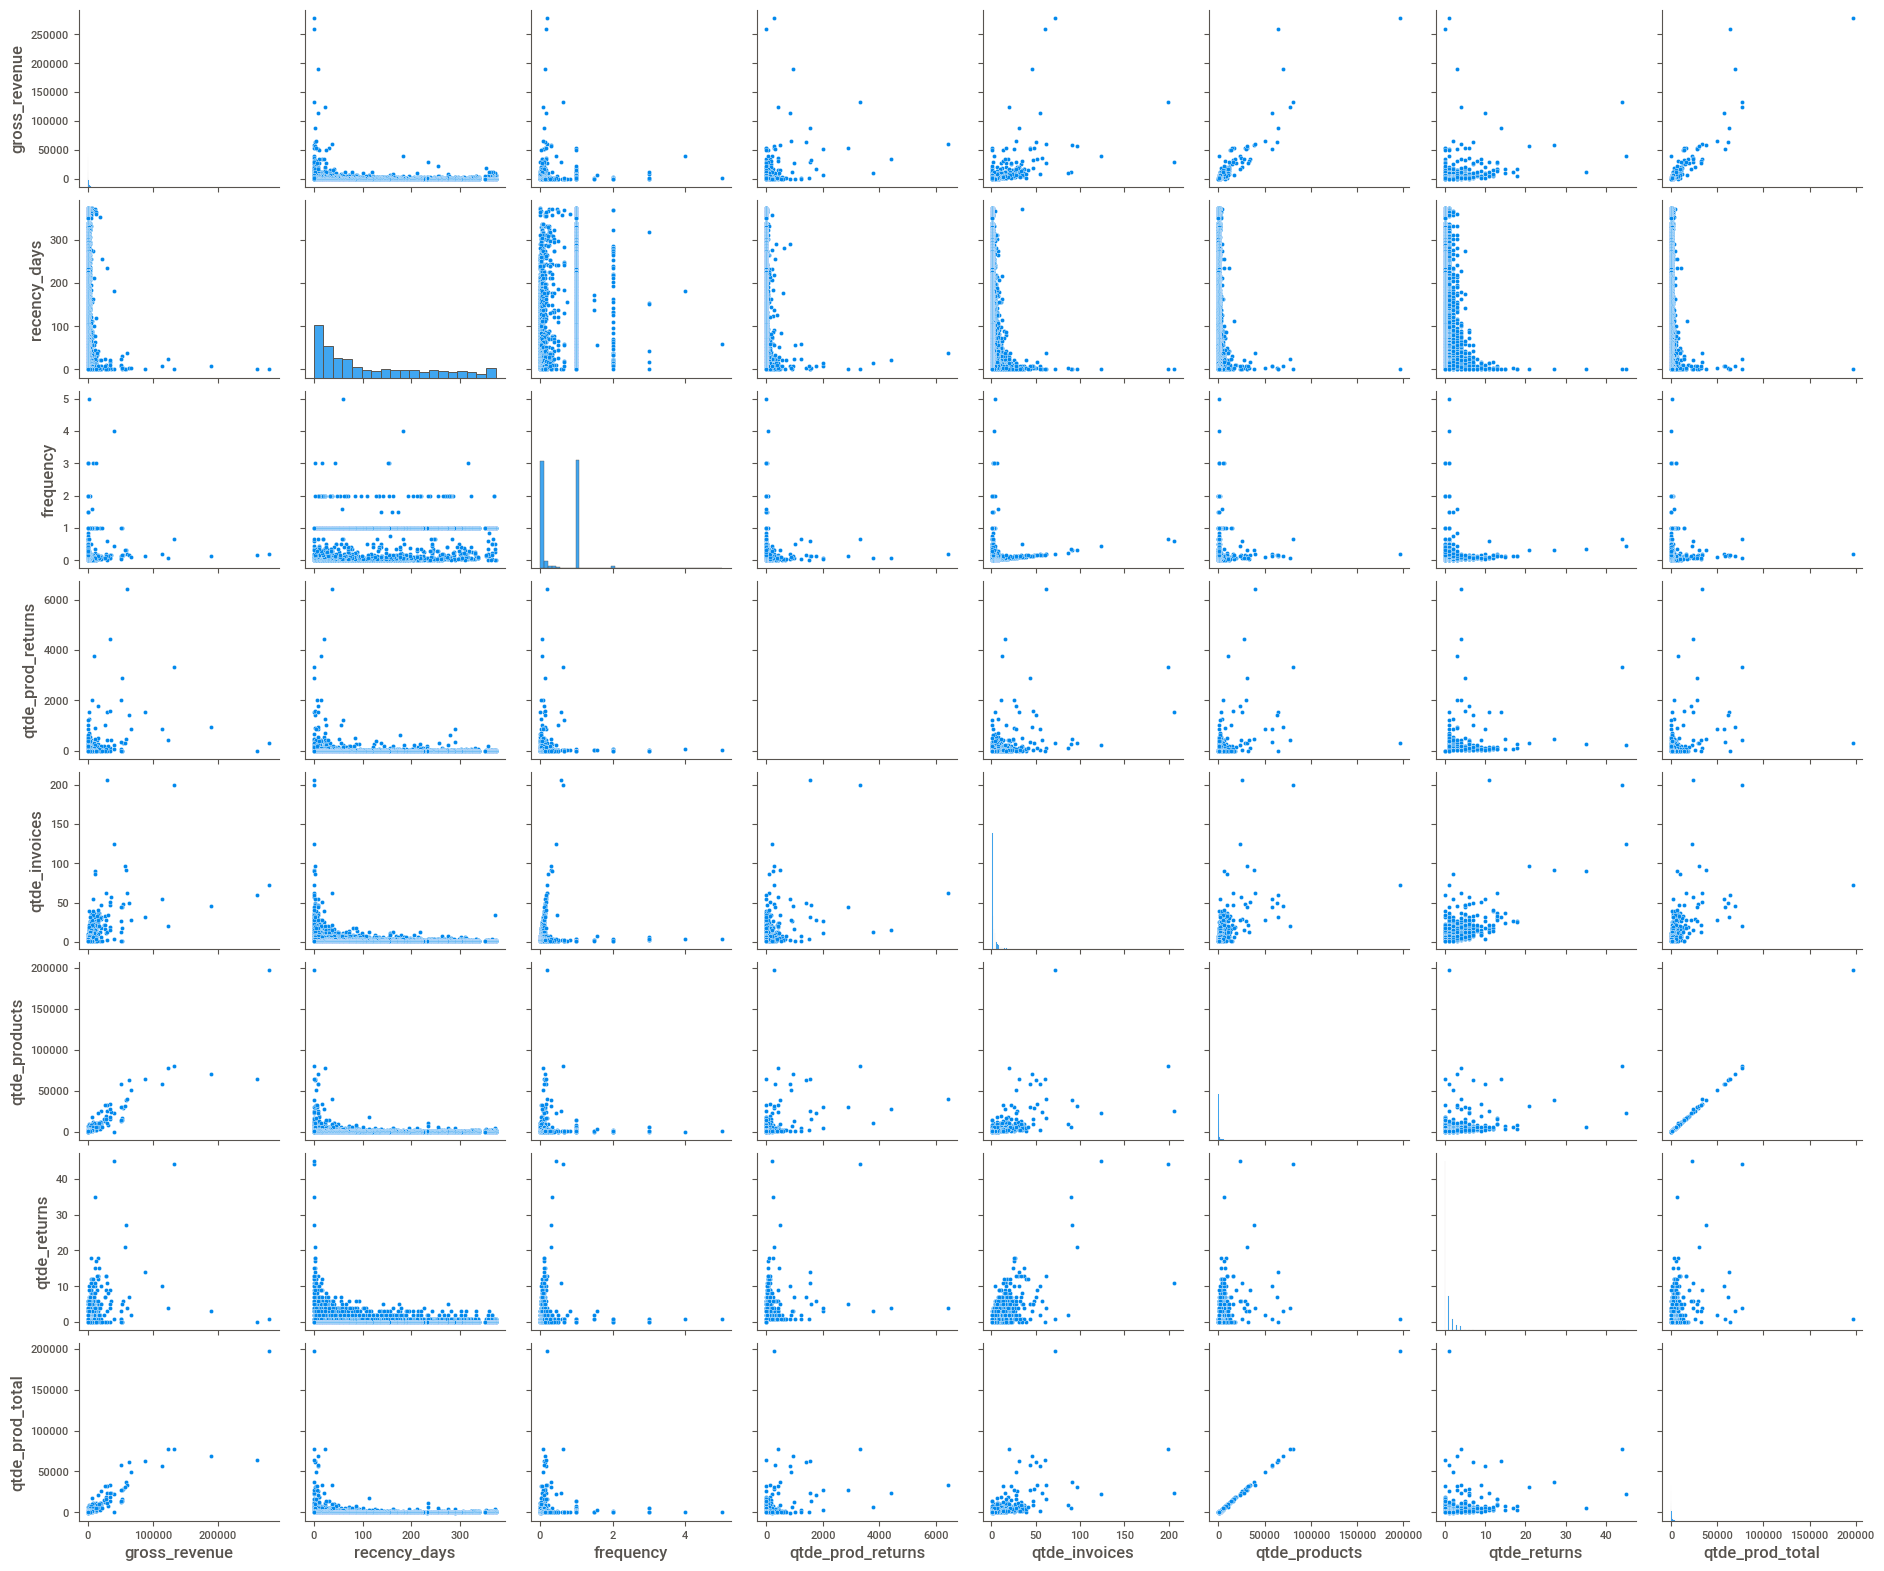

In [83]:
sns.pairplot(df42, height=2.0, aspect=1.2)

### 5.3 **Estudo do Espaço**

In [ ]:
# dropar qtde prod total devido à semelhança com qtde products

In [29]:
df43 = df4.drop(columns=['customer_id'], axis=1).copy()

In [ ]:
# antes de aplicar o pca, é necessário fazer a padronização dos dados:

In [31]:
mm = pp.MinMaxScaler()

df43['gross_revenue']     = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days']      = mm.fit_transform(df43[['recency_days']])
df43['frequency']         = mm.fit_transform(df43[['frequency']])
df43['qtde_prod_returns'] = mm.fit_transform(df43[['qtde_prod_returns']])
df43['qtde_invoices']     = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_products']     = mm.fit_transform(df43[['qtde_products']])
df43['qtde_returns']      = mm.fit_transform(df43[['qtde_returns']])
df43['qtde_prod_total']   = mm.fit_transform(df43[['qtde_prod_total']])

X = df43.copy()

#### 5.3.1 **PCA (Principal Component Analysis)**

<BarContainer object of 8 artists>

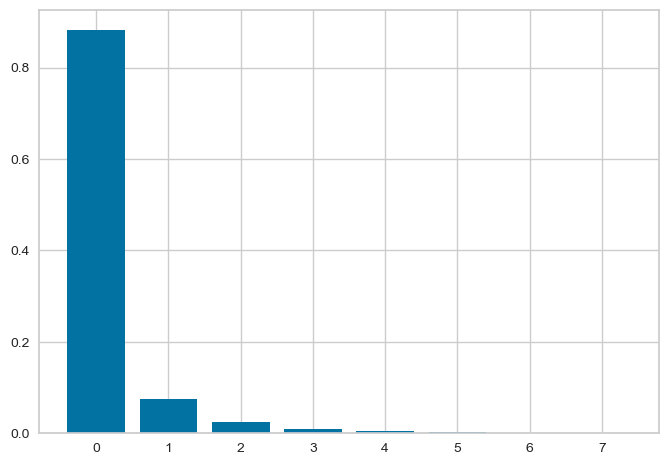

In [32]:
pca = dd.PCA(n_components=X.shape[1])  # reduzindo para X.shape dimensões

principal_components = pca.fit_transform(X)

# plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)

In [ ]:
# acima, vemos como cada componente do PC (PC1, PC2, PC3, PC4, ...) explicam a variância dos dados.

In [33]:
# verificando variância explicada:
print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

Variância explicada por componente: [8.82195185e-01 7.54753818e-02 2.55084964e-02 9.23111618e-03
 4.21660730e-03 2.75722031e-03 6.15992732e-04 0.00000000e+00]
Variância total explicada: 1.0000000000000002


In [ ]:
# contribuição de cada feature (0,1,2,3,...) para cada componente (PC1, PC2, PC3, PC4,...)

In [34]:
df_pca = pd.DataFrame(principal_components)
loadings = pd.DataFrame(
    pca.components_.T,  # para alinhar com as features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_pca.columns  # nome das features originais
)

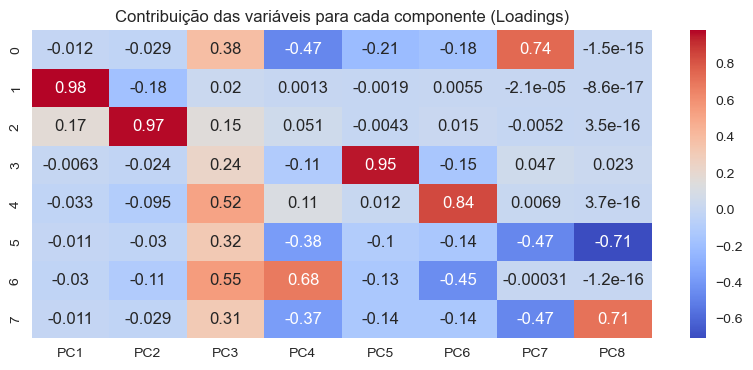

In [36]:
plt.figure(figsize=(10, 4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Contribuição das variáveis para cada componente (Loadings)')
plt.show()

In [ ]:
# relação das features originais (baseadas na soma das variâncias) com as componentes somadas de maior 
# variância (PC1 e PC2)

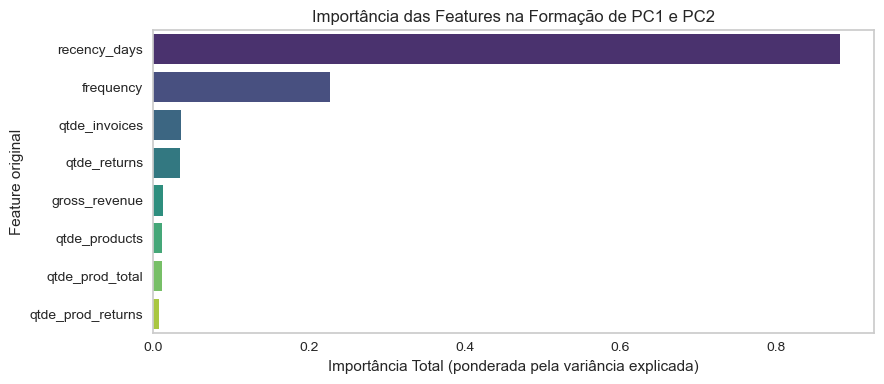

In [38]:
# selecionar os dois primeiros PCs (PC1 e PC2)
explained_var = pca.explained_variance_ratio_[:2]              # variância explicada por PC1 e PC2
abs_loadings = loadings.iloc[:, :2].abs()                      # loadings absolutos dos dois PCs

# soma dos loadings ponderados pela variância explicada
feature_importance = abs_loadings.mul(explained_var, axis=1).sum(axis=1)
feature_importance = feature_importance.sort_values(ascending=False) # ordenada em forma decrescente

loadings.index = X.columns # relacionando as features 0,1,2... com seus nomes originais

plt.figure(figsize=(9, 4))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel('Importância Total (ponderada pela variância explicada)')
plt.ylabel('Feature original')
plt.title('Importância das Features na Formação de PC1 e PC2')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# análise de segmentos com base no scatterplot (4 quadrantes):
# essa análise se baseia no fato que PC1 possui a recência como tendo maior peso
# e PC2 possui a frequência como tendo maior peso (vide heatmap dos loadings acima)
# assim: para PC1: valores altos → clientes recentes (compraram há pouco tempo)
#                  valores baixos → clientes inativos (não compram há muito tempo)
#        para PC2: valores altos → clientes frequentes
#                  valores baixos → clientes pouco frequentes

<Axes: xlabel='0', ylabel='1'>

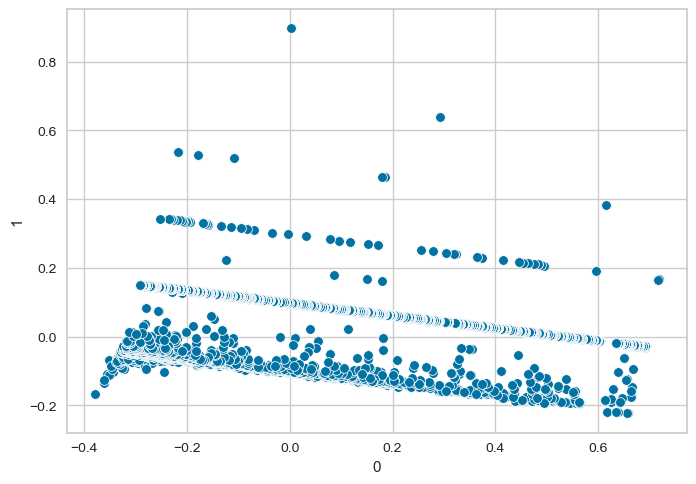

In [61]:
# plotando todos os dados no plano das duas primeiras componentes principais (PC1, PC2)
df_pca = pd.DataFrame(principal_components)
sns.scatterplot( x=0, y=1, data=df_pca )

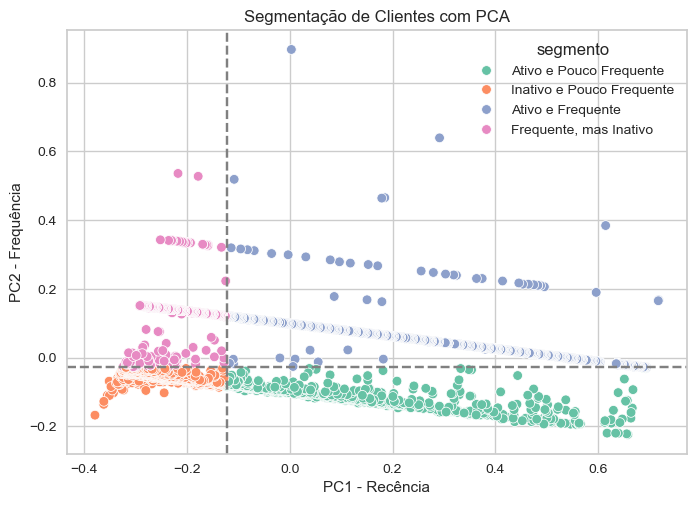

In [40]:
# criando segmentos com base na mediana
PC1 = 0
PC2 = 1
pc1_median = df_pca[PC1].median()
pc2_median = df_pca[PC2].median()

def segmentar_cliente(row):
    if row[PC1] >= pc1_median and row[PC2] >= pc2_median:
        return 'Ativo e Frequente'
    elif row[PC1] < pc1_median and row[PC2] >= pc2_median:
        return 'Frequente, mas Inativo'
    elif row[PC1] < pc1_median and row[PC2] < pc2_median:
        return 'Inativo e Pouco Frequente'
    else:
        return 'Ativo e Pouco Frequente'  # pode também indicar um cliente novo

df_pca['segmento'] = df_pca.apply(segmentar_cliente, axis=1)

sns.scatterplot(data=df_pca, x=PC1, y=PC2, hue='segmento', palette='Set2')
plt.axvline(x=pc1_median, color='gray', linestyle='--')
plt.axhline(y=pc2_median, color='gray', linestyle='--')
plt.title('Segmentação de Clientes com PCA')
plt.xlabel('PC1 - Recência')
plt.ylabel('PC2 - Frequência')
plt.grid(True)
plt.show()

In [44]:
df_pca.head()

0         1         2         3         4         5         6  \
0  0.665853 -0.146529  0.102498  0.014412 -0.001306  0.121036  0.006988   
1 -0.182511 -0.081952  0.078822  0.090930 -0.016641 -0.044928  0.002328   
2 -0.323148 -0.048322  0.046631 -0.001823 -0.006188  0.020574 -0.005401   
3 -0.075211 -0.086852 -0.023461 -0.009762  0.001149  0.011867  0.000825   
4  0.554767 -0.185231  0.023689  0.038156 -0.005157 -0.021962  0.001714   

              7                   segmento  
0 -2.081668e-17    Ativo e Pouco Frequente  
1 -2.970714e-17  Inativo e Pouco Frequente  
2  2.515349e-17  Inativo e Pouco Frequente  
3 -2.667137e-17    Ativo e Pouco Frequente  
4 -8.782038e-17    Ativo e Pouco Frequente

In [46]:
# calculando valores médios das features para os segmentos:
df_enriquecido = df_pca.copy()
df_enriquecido['segmento'] = df_pca['segmento']

resumo_segmentos = df_enriquecido.groupby('segmento').agg({
    0: 'mean',
    1: 'mean',
    2: 'mean',
    3: 'mean',
    4: 'mean',
    5: 'mean',
    6: 'mean',
    7: 'mean'
}).round(5).sort_values(0, ascending=False)

resumo_segmentos

0        1        2        3        4  \
segmento                                                                 
Ativo e Frequente          0.29034  0.04969  0.00323  0.00013 -0.00012   
Ativo e Pouco Frequente    0.12995 -0.11333 -0.01372 -0.00113  0.00049   
Frequente, mas Inativo    -0.21352  0.12607 -0.00647 -0.00125  0.00086   
Inativo e Pouco Frequente -0.25903 -0.05447  0.00433  0.00076 -0.00038   

                                 5        6    7  
segmento                                          
Ativo e Frequente          0.00066 -0.00014  0.0  
Ativo e Pouco Frequente   -0.00279  0.00016 -0.0  
Frequente, mas Inativo    -0.00277  0.00009  0.0  
Inativo e Pouco Frequente  0.00142  0.00005 -0.0

In [ ]:
# análise preliminar dos perfis de clientes para cada segmento:
Ativo e Frequente
    Alta receita, baixa recência, alta frequência.
    Perfil ideal: clientes fiéis e valiosos.
    Estratégia: manter o engajamento com recompensas.

Frequente, mas Inativo
    Gastam bem, mas não compram há muito tempo.
    Muitas devoluções: talvez insatisfação.
    Estratégia: reativação e escuta ativa (NPS, atendimento).

Ativo e Pouco Frequente (também há possibilidade de ser um cliente novo)
    Compraram recentemente, mas pouco.
    Potencial de crescimento.
    Estratégia: campanhas de onboarding e incentivo.

Inativo e Pouco Frequente
    Baixo valor, sem atividade recente.
    Pouco retorno esperado.
    Estratégia: campanha automatizada, ou foco em novos perfis.

#### 5.3.2 **UMAP (Uniform Manifold Approximation and Projection)**

In [ ]:
# para aplicar o umap, também é preciso padronizar os dados (já feito no início da seção Estudo do espaço)

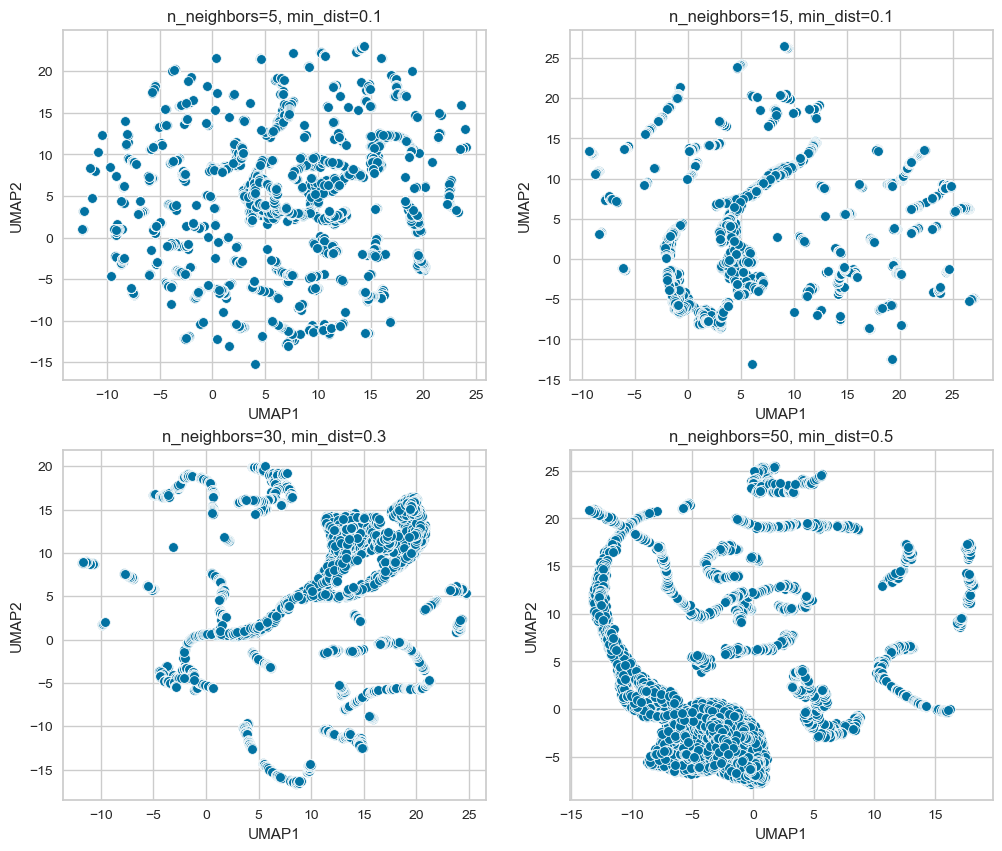

In [47]:
params_umap = [(5, 0.1), (15, 0.1), (30, 0.3), (50, 0.5)]
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for (n, d), ax in zip(params_umap, axes.flatten()):
    reducer = umap.UMAP(n_neighbors=n, min_dist=d, n_components=2, random_state=42)
    embedding = reducer.fit_transform(X)
    df_plot = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
    sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', ax=ax, palette='tab10')
    ax.set_title(f'n_neighbors={n}, min_dist={d}')

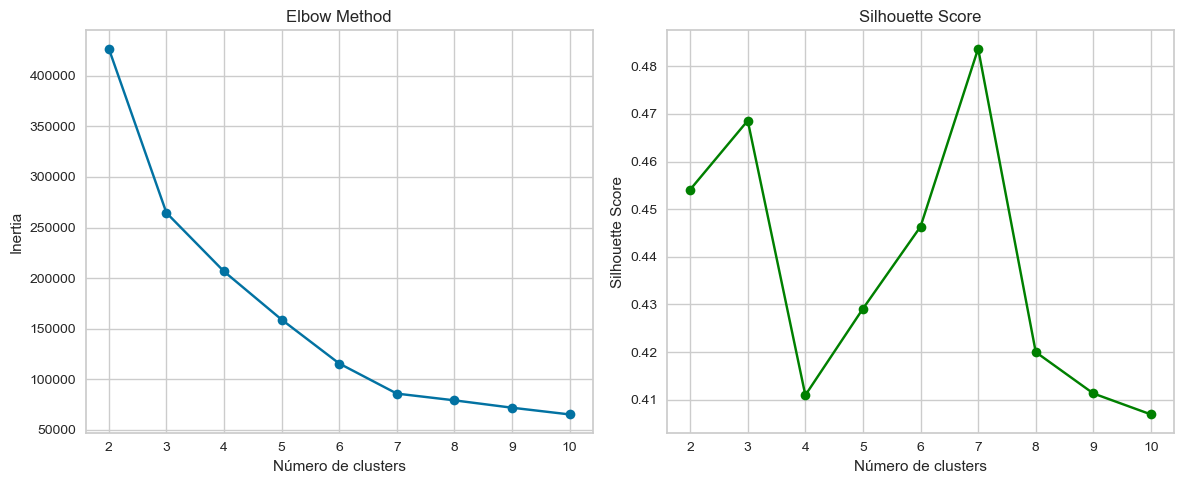

In [48]:
# fazendo o umap com o 'melhor' par de parâmetros e depois aplicando o kmeans sobre esses dados
# as técnicas elbow method e silhouette score também são aplicadas

umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = c.KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)

    inertia = kmeans.inertia_
    sil_score = mt.silhouette_score(X_umap, labels)

    inertias.append(inertia)
    silhouette_scores.append(sil_score)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_range, inertias, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_range, silhouette_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

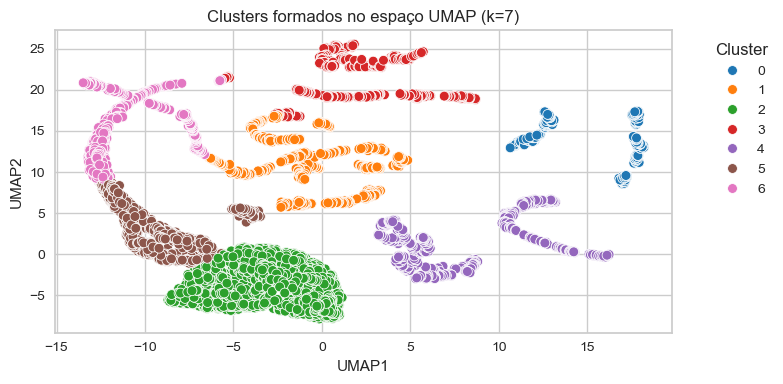

In [50]:
# com o resultado do elbow method e do silhouette score, foi escolhido k=7
# o umap e o kmeans são aplicados (idem ao feito acima) usando esse número de clusters k

umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

kmeans = c.KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# usando os labels gerados pelo kmeans (labels = a qual cluster pertence a linha do df)
df_plot = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_plot['cluster'] = clusters

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', hue='cluster', palette='tab10', s=50)
plt.title('Clusters formados no espaço UMAP (k=7)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5.3.3 **t-SNE (t-distributed Stochastic Neighbor Embedding)**

In [ ]:
# o t-SNE também precisa de valores padronizados

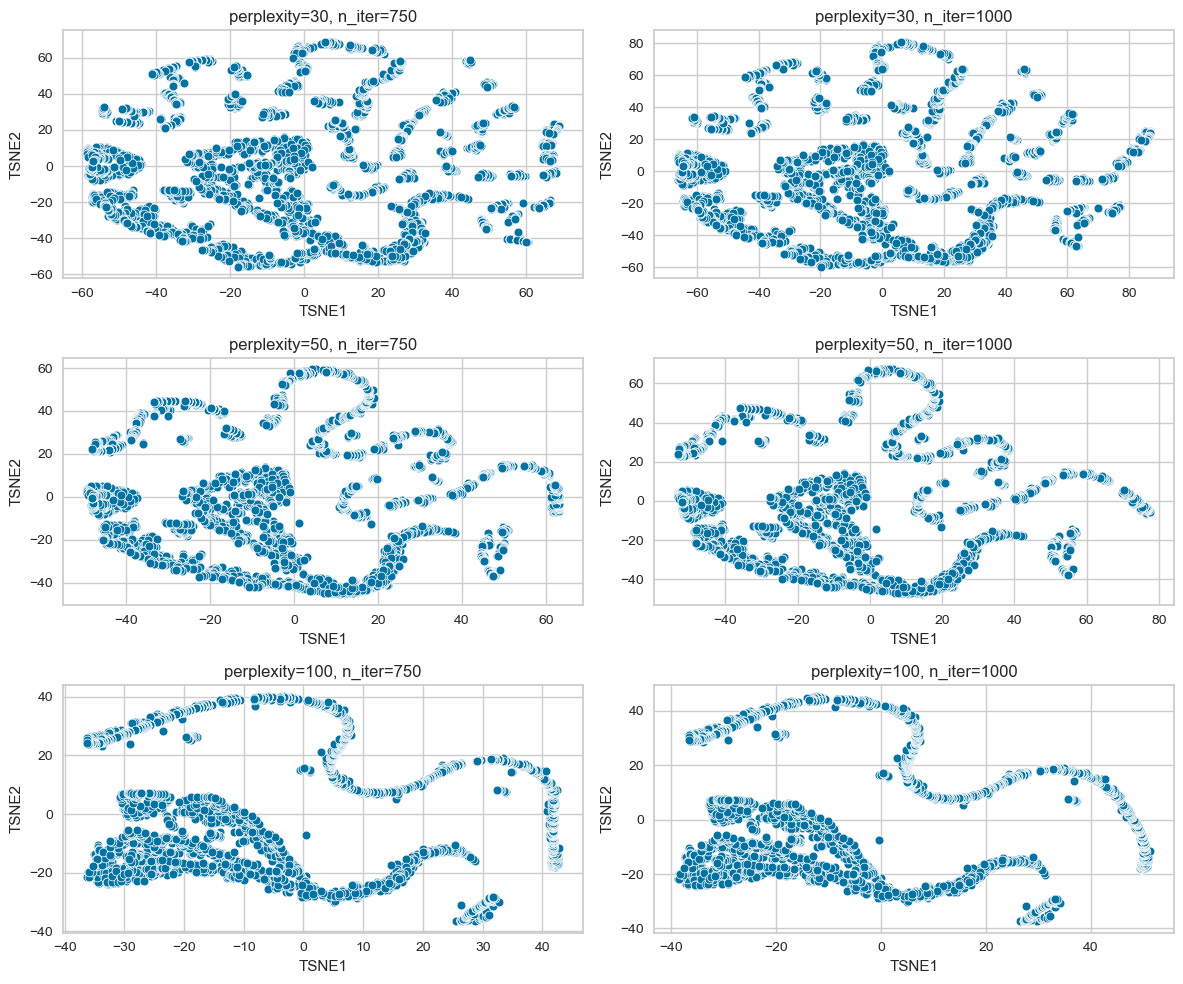

In [51]:
perplexities = [30, 50, 100]
n_iters = [750, 1000]

fig, axes = plt.subplots(len(perplexities), len(n_iters), figsize=(12, 10))

for i, p in enumerate(perplexities):
    for j, n in enumerate(n_iters):
        tsne = mn.TSNE(n_components=2, perplexity=p, n_iter=n, random_state=42)
        tsne_result = tsne.fit_transform(X)
        
        df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
        
        ax = axes[i, j]
        sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='tab10', s=40, ax=ax, legend=False)
        ax.set_title(f'perplexity={p}, n_iter={n}')
        
plt.tight_layout()
plt.show()

#### 5.3.4 **Tree-based embedding** 

In [ ]:
# ao usar um algoritmo de árvore para fazer o embbeding é como se 'transformássemos' o problema em um supervisionado
# para isso, precisamos de uma variável alvo (para esse problema de negócio, foi escolhido o 'gross_revenue')
# o modelo é treinado normalmente e, depois, criamos um dataframe (df_leaf) com as posições geradas por cada folha
# é sobre esse 'espaço' que vamos fazer o umap

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

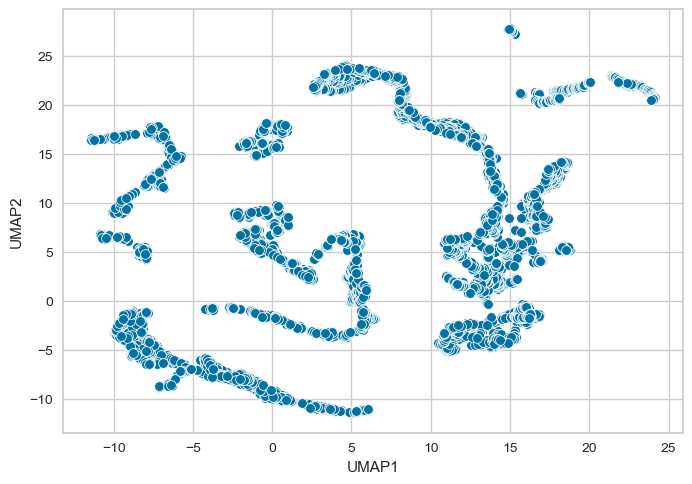

In [53]:
X = df4.drop(columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

df_leaf = pd.DataFrame(rf_model.apply(X))

reducer_tree = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2, random_state=42)
embedding_tree = reducer_tree.fit_transform(df_leaf)

df_tree = pd.DataFrame(embedding_tree, columns=['UMAP1', 'UMAP2'])
sns.scatterplot(data=df_tree, x='UMAP1', y='UMAP2')

In [ ]:
# aqui, vemos os clusters facilmente. aparentemente, uns 7, 8 clusters

# 6.0 Data Preparation

In [54]:
df5 = df4.copy()

In [55]:
mm = pp.MinMaxScaler()

df5['gross_revenue']     = mm.fit_transform(df5[['gross_revenue']])
df5['recency_days']      = mm.fit_transform(df5[['recency_days']])
df5['frequency']         = mm.fit_transform(df5[['frequency']])
df5['qtde_prod_returns'] = mm.fit_transform(df5[['qtde_prod_returns']])
df5['qtde_invoices']     = mm.fit_transform(df5[['qtde_invoices']])
df5['qtde_products']     = mm.fit_transform(df5[['qtde_products']])
df5['qtde_returns']      = mm.fit_transform(df5[['qtde_returns']])
df5['qtde_prod_total']   = mm.fit_transform(df5[['qtde_prod_total']])

# 7.0 Hyperparameter fine-tuning

In [56]:
X = df5.drop(columns=['customer_id']).copy()

In [ ]:
# Para esse ciclo, o fine tuning será feito usando os algoritmos K-means e Hierarchical Clustering
# a análise dos resultados será através das métricas:
# WSS --> soma dos quadrados das distâncias entre os pontos de um cluster e o seu centróide -> menor valor, melhor
# SS --> combina coesão interna e separação entre clusters -> mais próximo de 1, melhor
# DBI --> mede a "semelhança" entre clusters, penalizando sobreposição -> mais próximo de zero, melhor
# CHI --> razão entre dispersão entre clusters / dentro dos clusters -> maior valor, melhor

# WSS: Within-Cluster Sum of Squares
# SS: Silhouette Score
# DBI: Davies-Bouldin Index	
# CHI: Calinski-Harabasz Index

#### 7.1 **K-means**

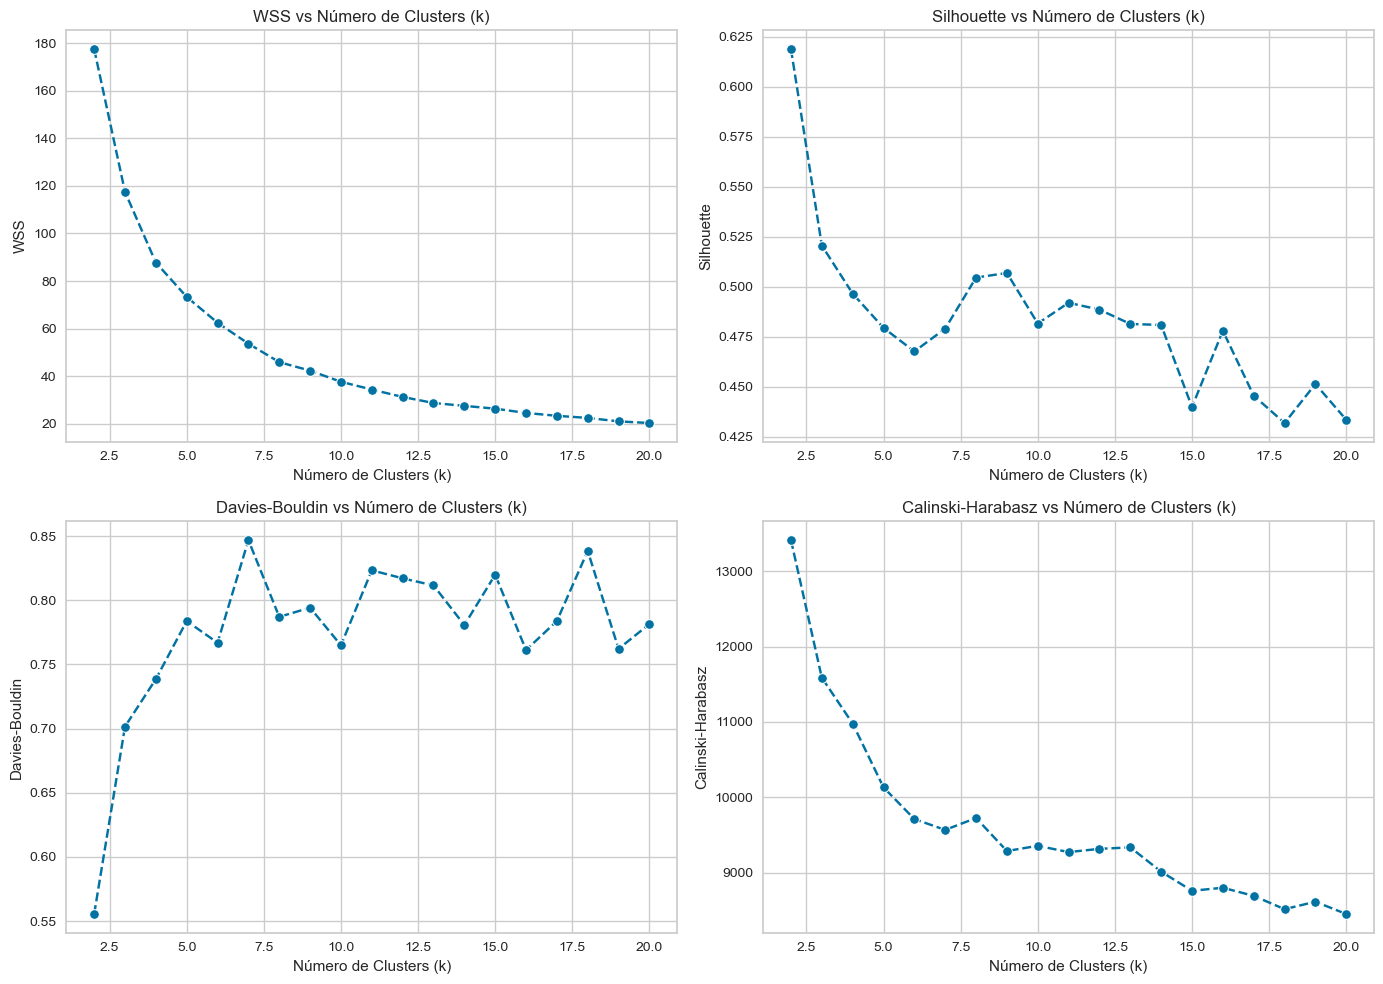

In [57]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model.fit(X)
    km_labels = kmeans_model.predict(X)

    result_kmeans = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model.inertia_,
        'Silhouette': mt.silhouette_score(X, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X, km_labels)}
    results.append(result_kmeans)
    
df_kmeans = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.2 **Hierarchical Clustering**

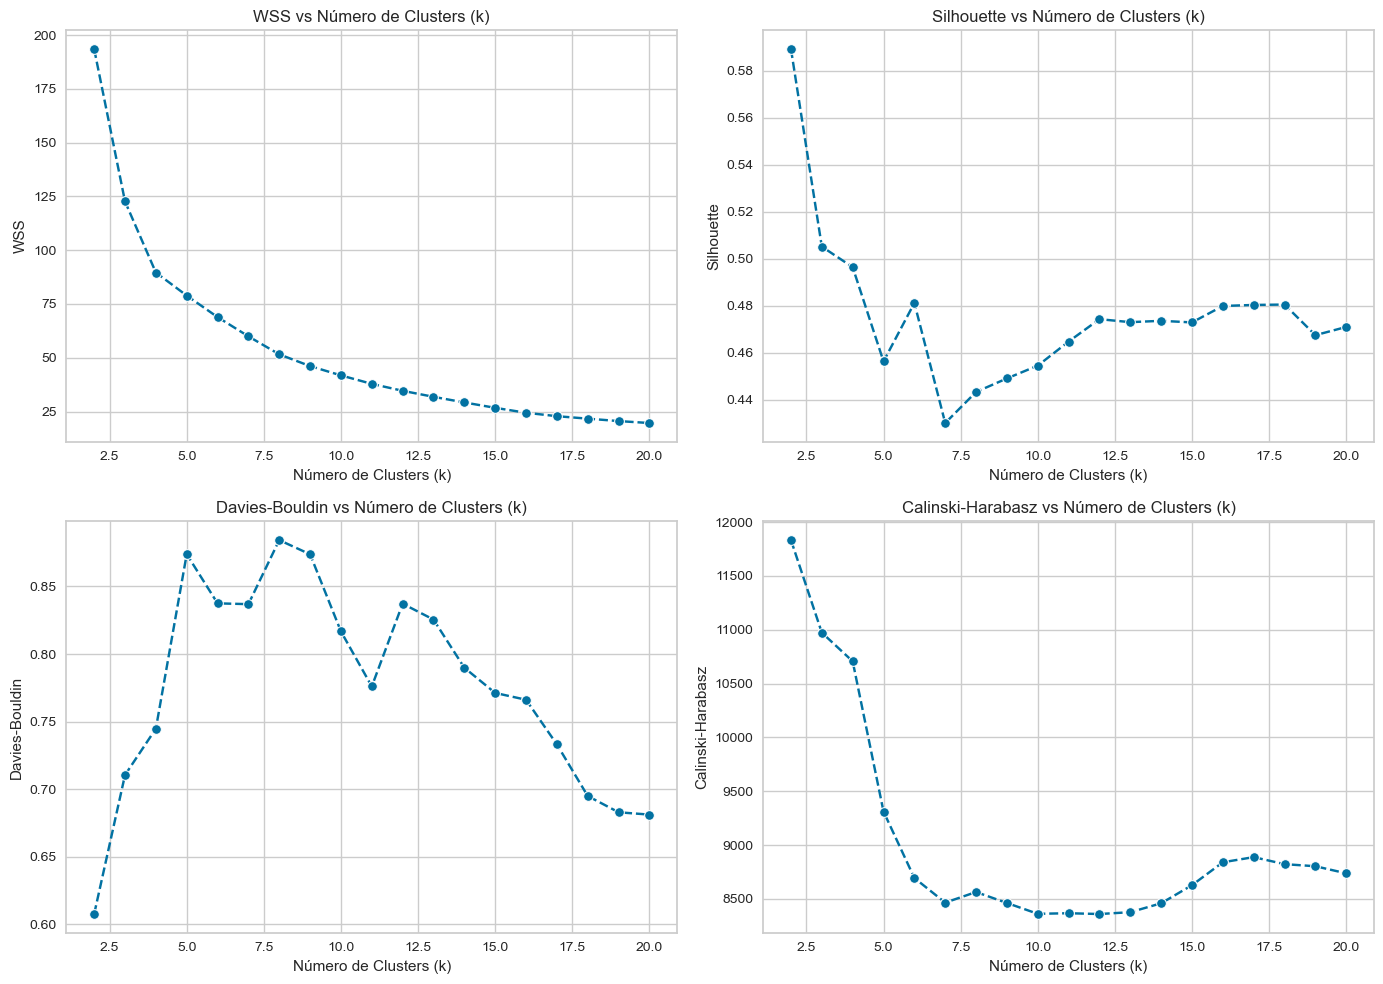

In [58]:
clusters = np.arange(2, 21, 1)
results=[]

for k in clusters:
    hc_model = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model.fit_predict(X)
    
    result_hierarchical = {
        'k': k,
        'WSS': calculate_wss(X, hc_labels),
        'Silhouette': mt.silhouette_score(X, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X, hc_labels)}
    results.append(result_hierarchical)

df_hc = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# como não houve redução na dimensionalidade ao fazer o PCA, o que acaba acontecendo é uma rotação linear
# dos dados que não afeta a distância entre os pontos. A consequência é o mesmo resultado para as métricas
# entre os dados do dataframe X e do dataframe df_pca.

#### 7.3 **K-means com dados gerados pelo UMAP**

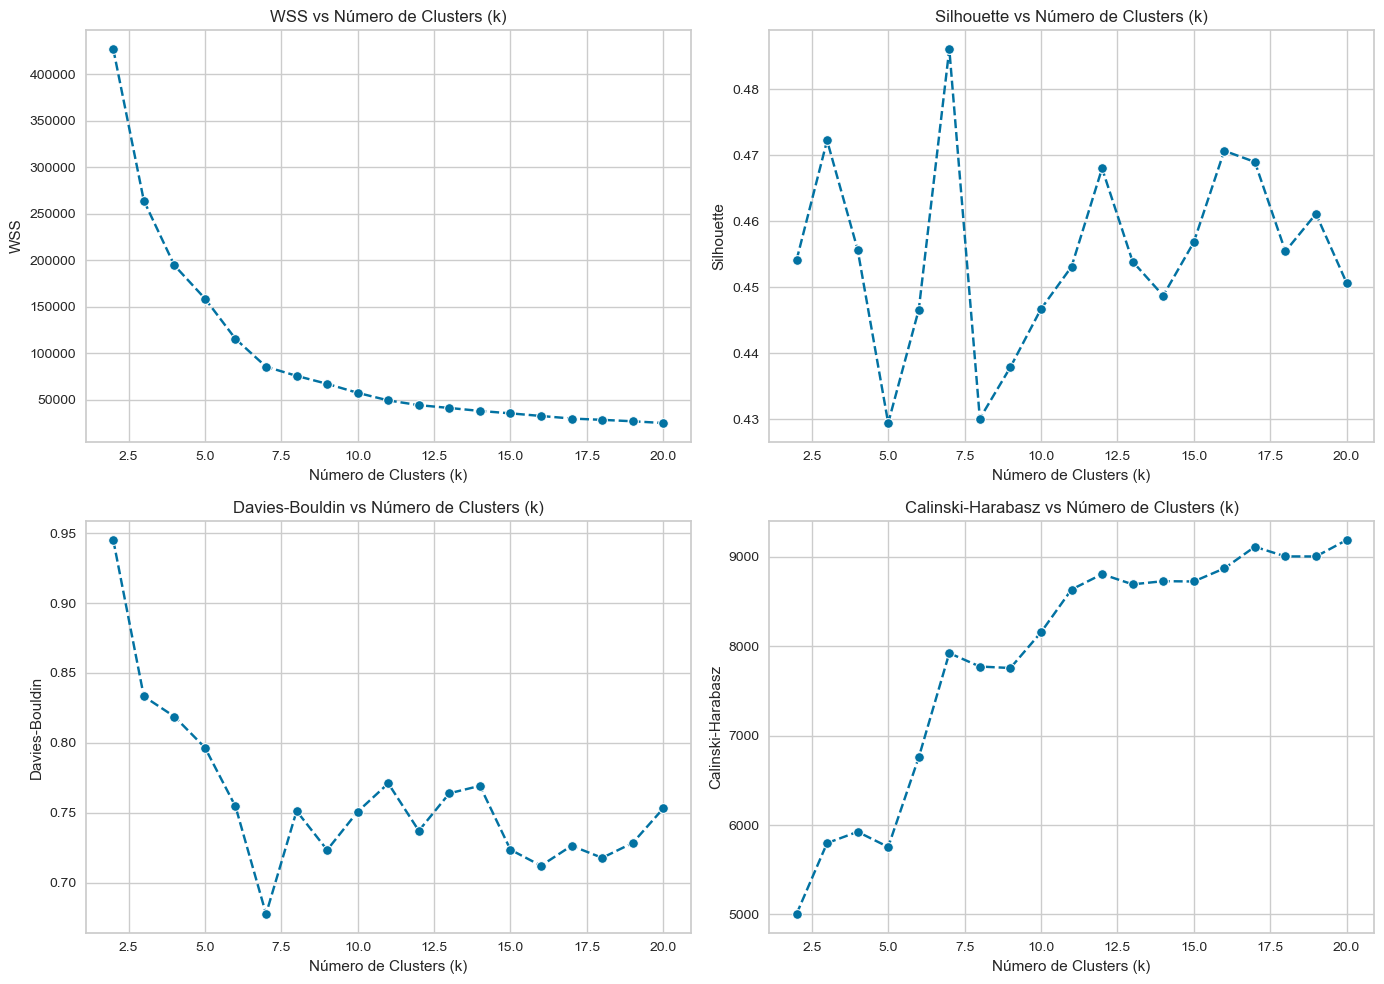

In [64]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model_umap = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model_umap.fit(X_umap)
    km_labels = kmeans_model_umap.predict(X_umap)

    result_kmeans_umap = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model_umap.inertia_,
        'Silhouette': mt.silhouette_score(X_umap, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X_umap, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X_umap, km_labels)}
    results.append(result_kmeans_umap)
    
df_kmeans_umap = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans_umap, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.4 **Hierarchical Clustering com dados gerados pelo UMAP**

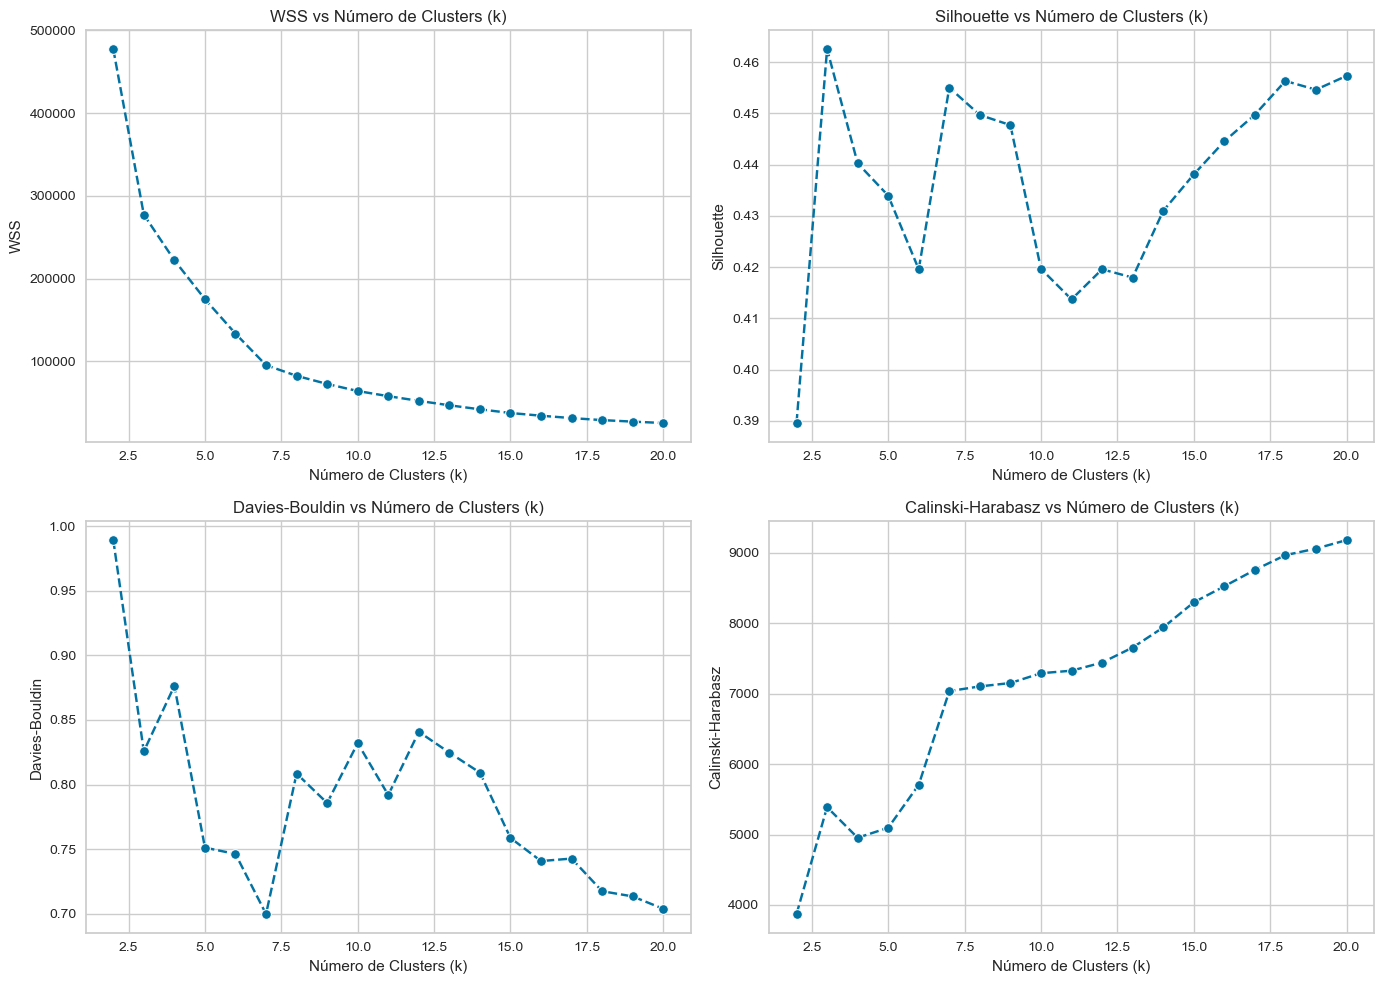

In [65]:
clusters = np.arange(2, 21, 1)
results=[]

def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

for k in clusters:
    hc_model_umap = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model_umap.fit_predict(X_umap)
    
    result_hierarchical_umap = {
        'k': k,
        'WSS': calculate_wss(X_umap, hc_labels),
        'Silhouette': mt.silhouette_score(X_umap, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(X_umap, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(X_umap, hc_labels)}
    results.append(result_hierarchical_umap)

df_hc_umap = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc_umap, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# com os dados gerados pelo UMAP, como há a redução de dimensão, tem a variação nos valores das métricas
# no entanto, as métricas apresentam faixas de valores que são 'piores' do que aqueles resultantes do
# dataframe X. 
# Por ex.: SS mais próximo de 1 é melhor. Para X, no k-means, os valores estão na faixa de 0,64-0,48 e, 
# para X_umap, 0,5-0,44.

#### 7.5 **K-means com dados gerados pela RandomForest**

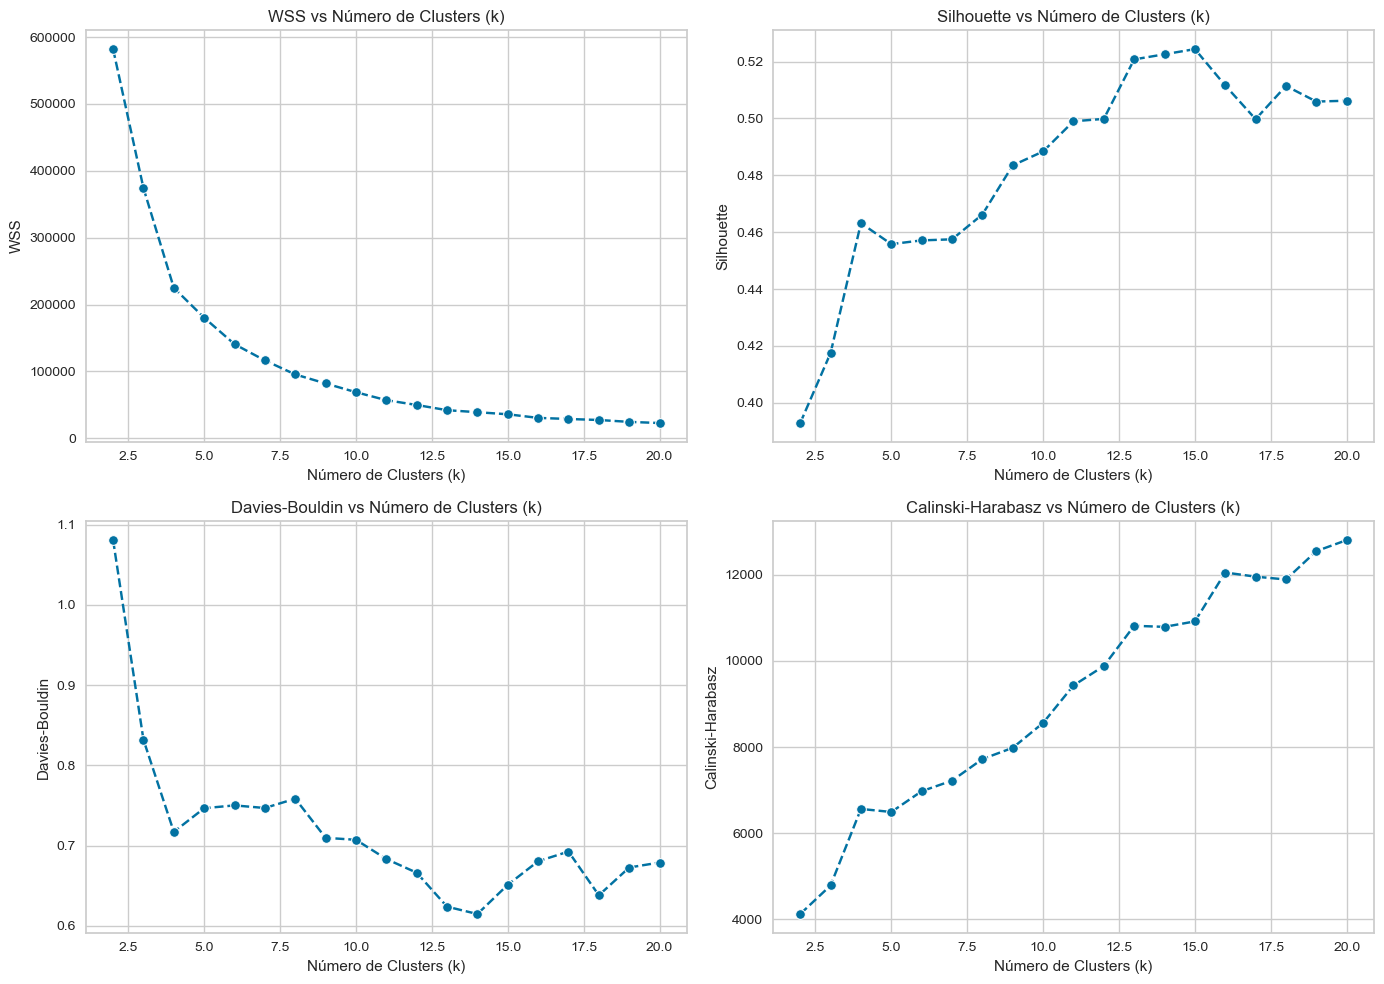

In [66]:
clusters = np.arange(2, 21, 1)
results=[]
for k in clusters:
    kmeans_model_tree = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans_model_tree.fit(df_tree)
    km_labels = kmeans_model_tree.predict(df_tree)

    result_kmeans_tree = {
        'model': 'KMeans',
        'k': k,
        'WSS': kmeans_model_tree.inertia_,
        'Silhouette': mt.silhouette_score(df_tree, km_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(df_tree, km_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(df_tree, km_labels)}
    results.append(result_kmeans_tree)
    
df_kmeans_tree = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_kmeans_tree, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.6 **Hierarchical Clustering com dados gerados pela RandomForest**

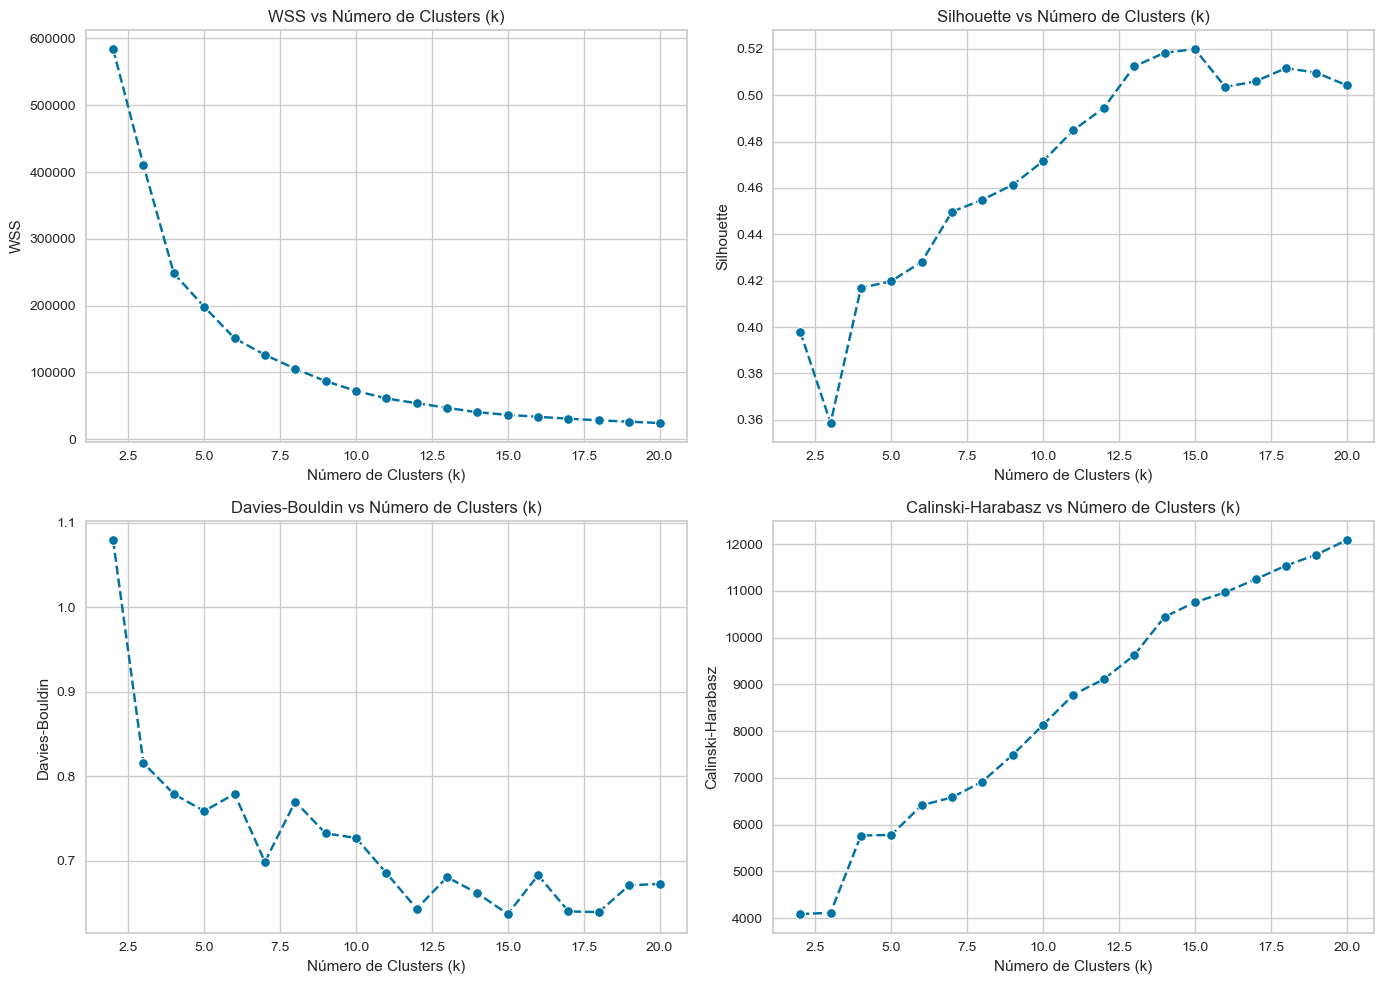

In [67]:
clusters = np.arange(2, 21, 1)
results=[]

def calculate_wss(X, labels):
    X = np.array(X)
    wss = 0
    for cluster in np.unique(labels):
        points = X[labels == cluster]
        centroid = points.mean(axis=0)
        wss += np.sum((points - centroid) ** 2)
    return float(wss)

for k in clusters:
    hc_model_tree = c.AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc_model_tree.fit_predict(df_tree)
    
    result_hierarchical_tree = {
        'k': k,
        'WSS': calculate_wss(df_tree, hc_labels),
        'Silhouette': mt.silhouette_score(df_tree, hc_labels),
        'Davies-Bouldin': mt.davies_bouldin_score(df_tree, hc_labels),
        'Calinski-Harabasz': mt.calinski_harabasz_score(df_tree, hc_labels)}
    results.append(result_hierarchical_tree)

df_hc_tree = pd.DataFrame(results)

metrics = ['WSS', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df_hc_tree, x='k', y=metric, marker='o', linestyle='--')
    plt.title(f'{metric} vs Número de Clusters (k)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# as métricas do kmeans com dados do umap estão um pouco melhor que as demais para k=7

#### 7.7 **Análise da Silhouette Score**

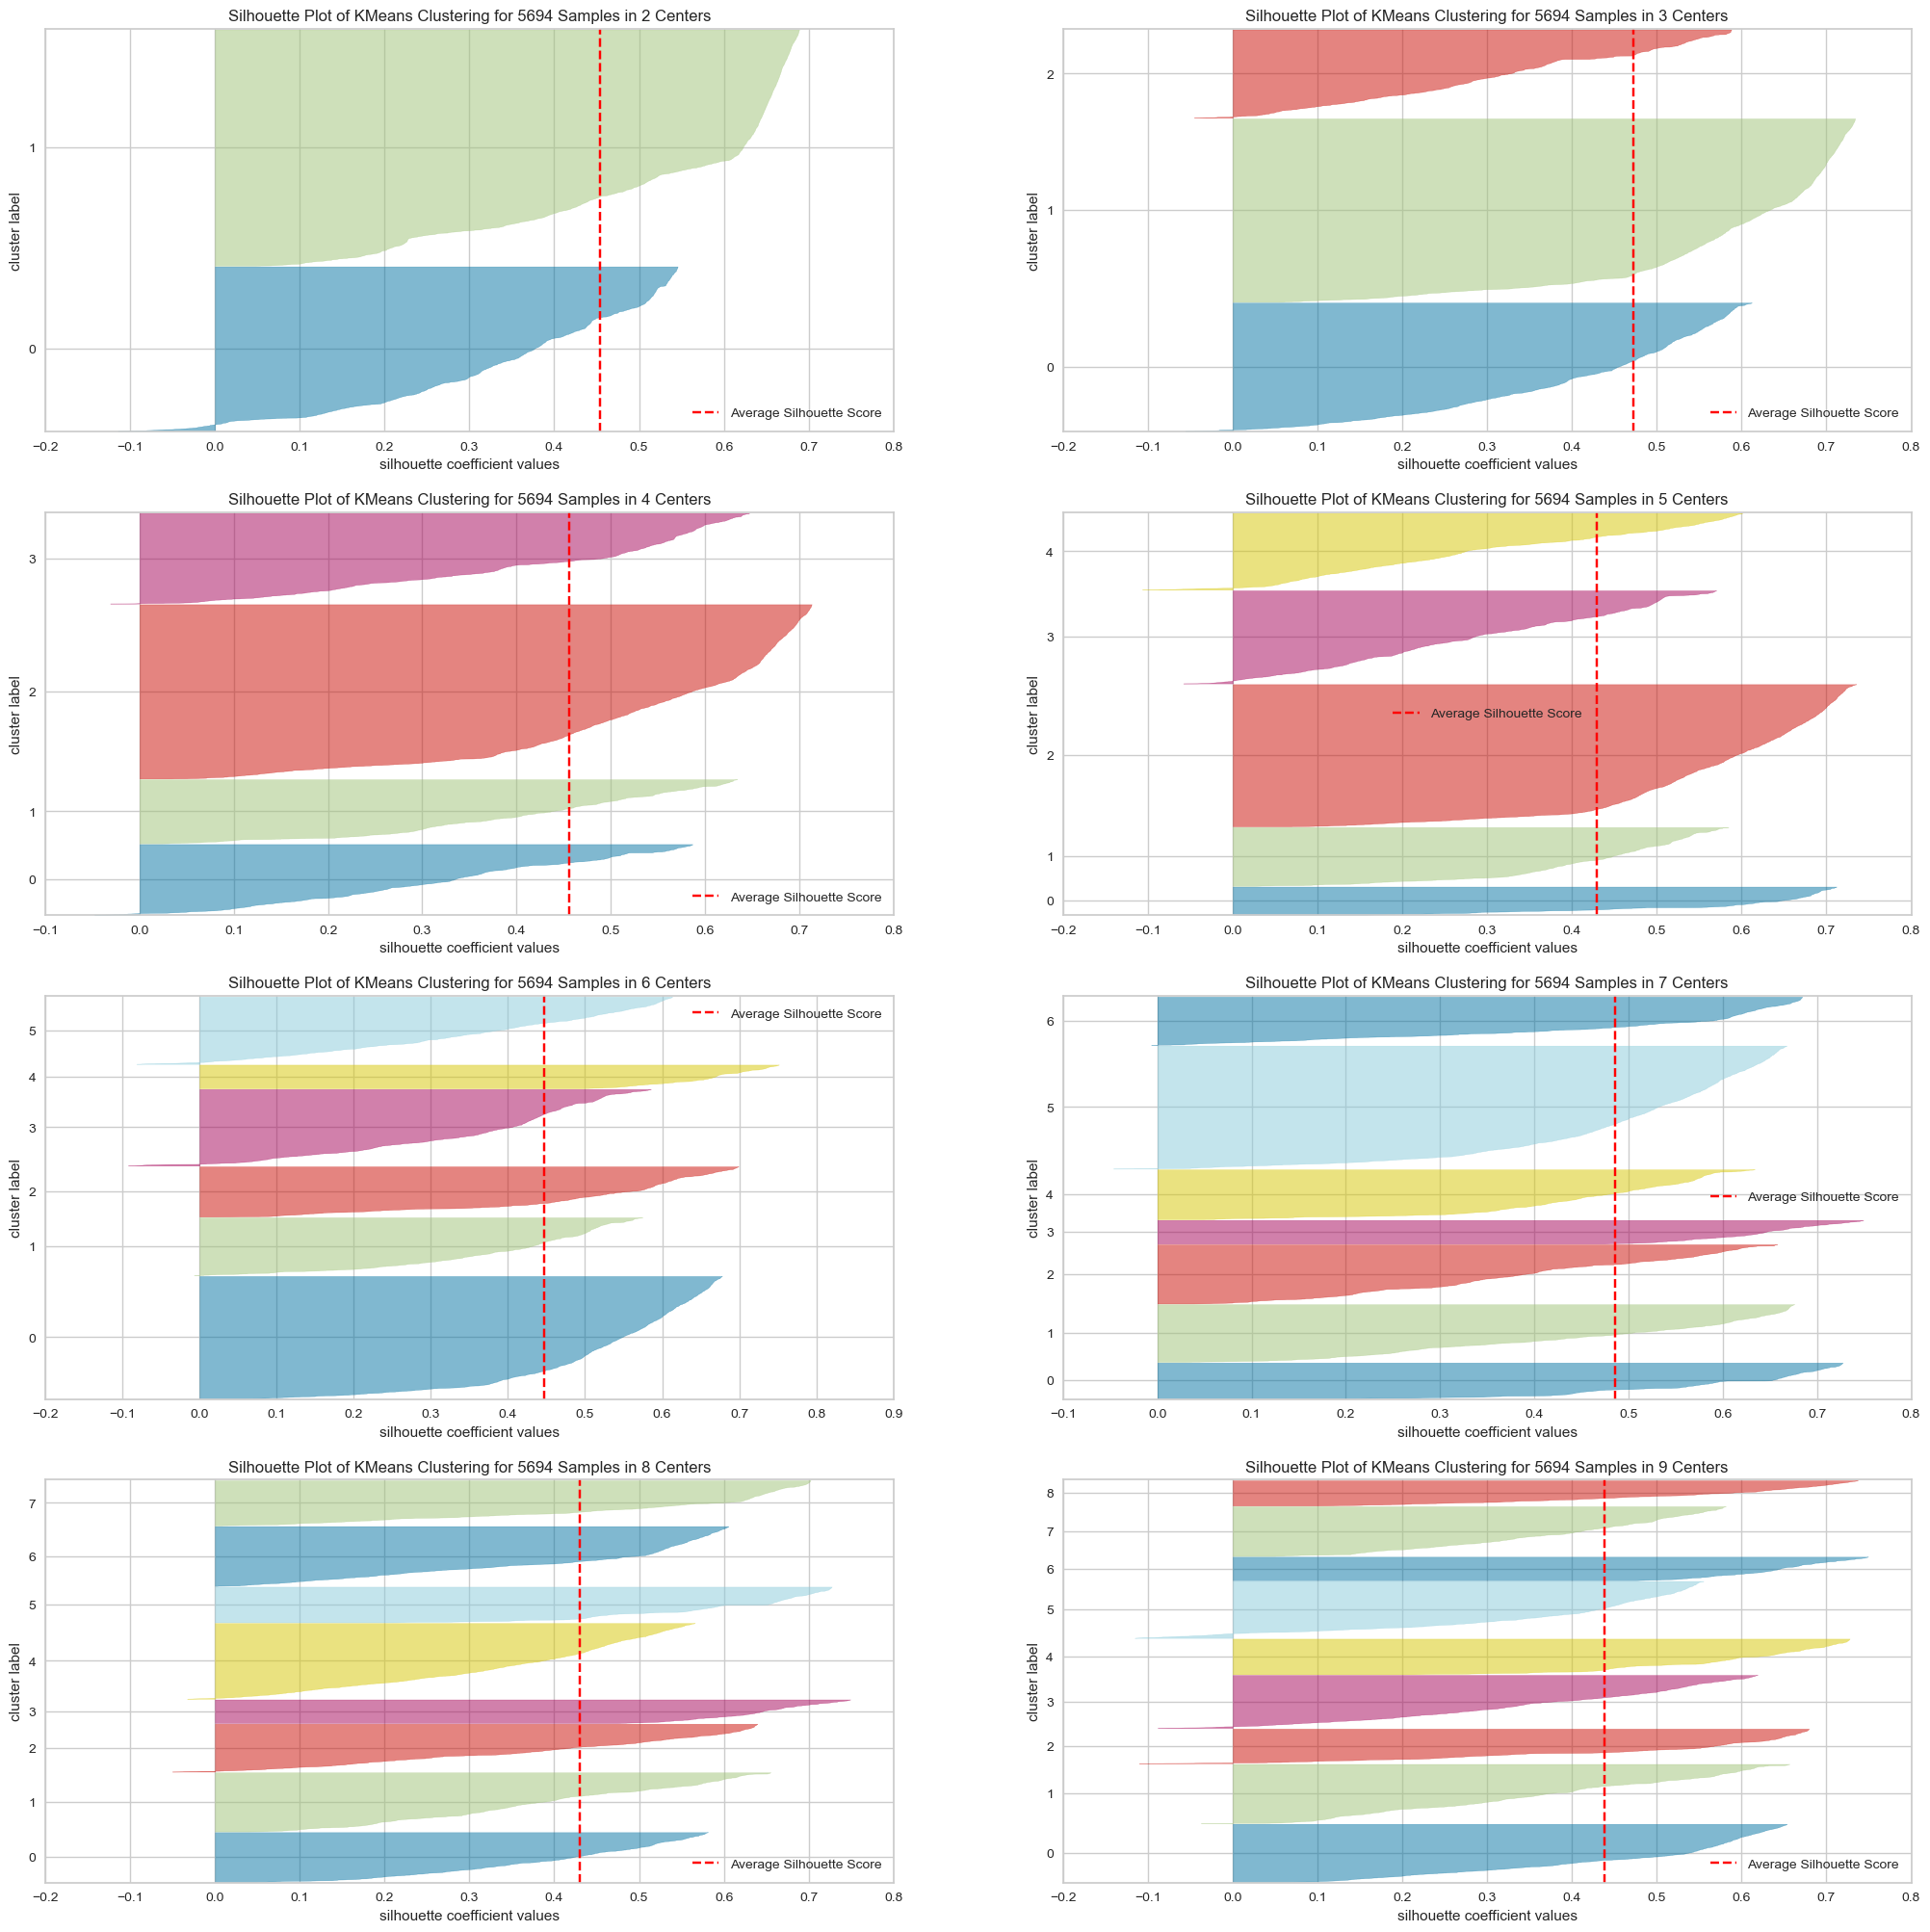

In [68]:
fig, ax = plt.subplots(4, 2, figsize=(25, 25))
clusters=[2, 3, 4, 5, 6, 7, 8, 9]

for k in clusters:
    kmean = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_umap)
    visualizer.finalize()

#### 7.8 **Dendrograma**

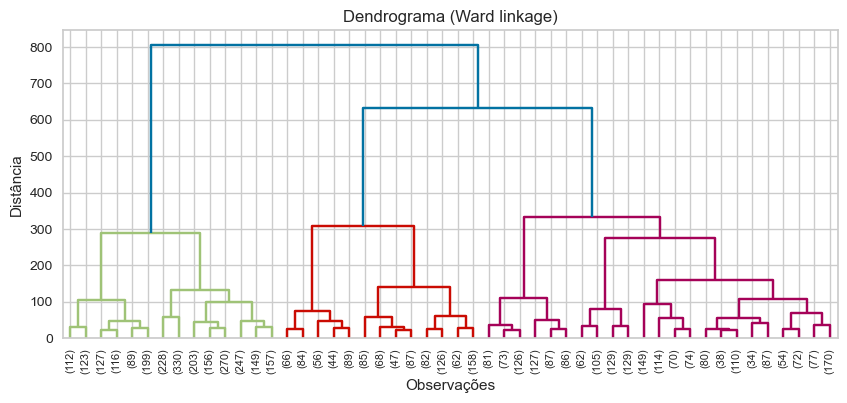

In [69]:
linked = linkage(X_umap, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(linked, truncate_mode='lastp', p=50)
plt.title("Dendrograma (Ward linkage)")
plt.xlabel("Observações")
plt.ylabel("Distância")
plt.show()

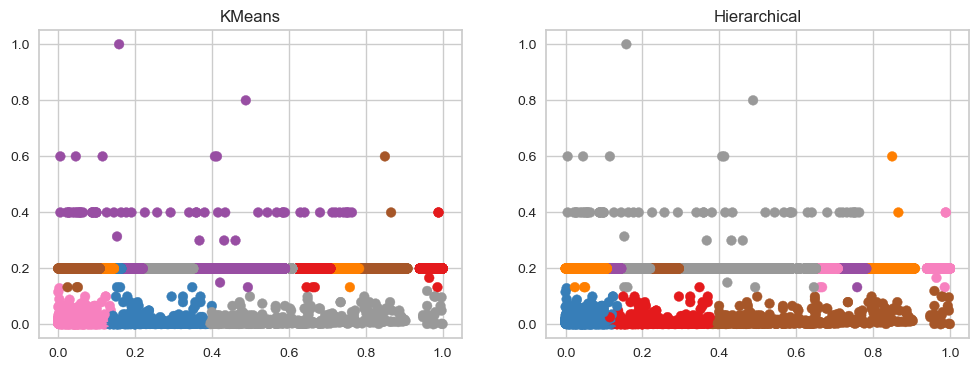

In [72]:
# cortando o dendrograma para obter 7 clusters
clusters = fcluster(linked, t=7, criterion='maxclust')

kmeans_model = c.KMeans(init='random', n_clusters=7, n_init=10, max_iter=300, random_state=42)
kmeans_model.fit(X_umap)
km_labels = kmeans_model.predict(X_umap)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# as colunas de X escolhidas são aquelas referentes às variáveis com maior contribuição às PCs
# que foram recency_days e frequency:

axes[0].scatter(X.iloc[:, 1], X.iloc[:, 2], c=km_labels, cmap='Set1')
axes[0].set_title("KMeans")

axes[1].scatter(X.iloc[:, 1], X.iloc[:, 2], c=clusters, cmap='Set1')
axes[1].set_title("Hierarchical")

plt.show()

# 8.0 Model training

In [ ]:
# baseando nos resultados da seção anterior, para uma análise inicial, vamos usar o K-means
# e o dataframe X_umap. considerando um cenário mais geral, menos de 10 clusters pode ser interessante,
# uma vez que não irá criar grupos específicos demais e, mais que 2 clusters para não ter grupos
# heterogêneos demais. usando essa limitação, o número de clusters k=7 apresenta boas métricas.

### 8.1 **K-Means**

In [73]:
k = 7
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_umap)
labels = kmeans.labels_

print('WSS value: {:.3f}'.format(kmeans.inertia_))
print('SS value: {:.3f}'.format(mt.silhouette_score(X_umap, labels, metric='euclidean')))

WSS value: 85732.570
SS value: 0.486


# 9.0 Cluster Analysis

In [74]:
df6 = df4.copy() # df4 possui os dados sem aplicar o minmaxscaler
df6['cluster'] = labels

In [75]:
df6.head()

customer_id  gross_revenue  recency_days  frequency  qtde_prod_returns  \
0      17850.0        5303.48         372.0   0.486111               37.0   
1      13047.0        3089.10          56.0   0.048780               35.0   
2      12583.0        6629.34           2.0   0.045699               50.0   
3      13748.0         948.25          95.0   0.017921                0.0   
4      15100.0         635.10         333.0   0.136364               22.0   

   qtde_invoices  qtde_products  qtde_returns  qtde_prod_total  cluster  
0           34.0         1733.0           1.0           1696.0        6  
1            9.0         1390.0           7.0           1355.0        1  
2           15.0         5028.0           2.0           4978.0        5  
3            5.0          439.0           0.0            439.0        1  
4            3.0           80.0           3.0             58.0        6

### 9.1 **Inspeção visual**

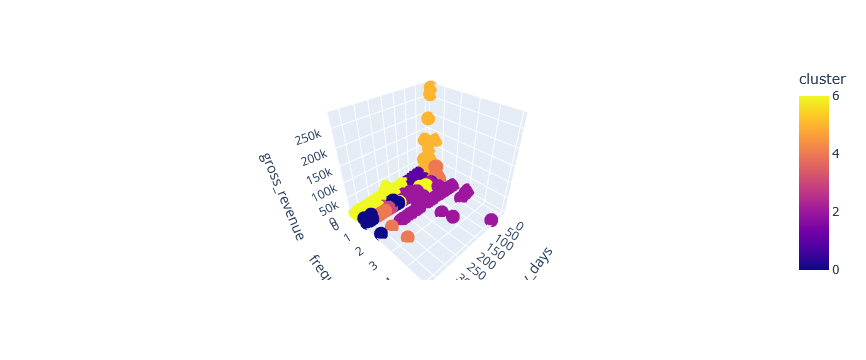

In [76]:
fig = px.scatter_3d(df6, x='recency_days', y='frequency', z='gross_revenue', color='cluster')
fig.show()

### 9.2 **Cluster Profile**

In [78]:
# número de customers
df_cluster = df6[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum()) * 100

# gross revenue média
df_avg_gross_revenue = df6[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# recency days média
df_avg_recency_days = df6[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# frequency média
df_avg_frequency = df6[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_frequency, how='inner', on='cluster')

# qtde products returns média
df_avg_qtde_prod_returns = df6[['qtde_prod_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_prod_returns, how='inner', on='cluster')

# qtde invoices média
df_avg_qtde_invoices = df6[['qtde_invoices', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_invoices, how='inner', on='cluster')

# qtde products média
df_avg_qtde_prod = df6[['qtde_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_prod, how='inner', on='cluster')

# qtde returns média
df_avg_qtde_returns = df6[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_returns, how='inner', on='cluster')

# qtde products total média
df_avg_qtde_prod_total = df6[['qtde_prod_total', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_qtde_prod_total, how='inner', on='cluster')

# gross revenue total do cluster
aux = df6[['gross_revenue', 'cluster']].groupby('cluster').sum().reset_index()
df_cluster = pd.merge(df_cluster, aux.rename(columns={'gross_revenue': 'gross_revenue_total'}), how='inner', on='cluster')

In [79]:
df_cluster = df_cluster.sort_values(by='gross_revenue', ascending=False)
df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days  \
5        5         1763      30.962417    3639.733522     17.198525   
1        1          826      14.506498    1214.226041     79.560533   
4        4          715      12.557078    1006.201469    138.993007   
6        6          691      12.135581     802.077106    182.778582   
0        0          512       8.991921     748.280254    306.019531   
2        2          848      14.892870     634.462700    150.396226   
3        3          339       5.953635     493.778850    176.191740   

   frequency  qtde_prod_returns  qtde_invoices  qtde_products  qtde_returns  \
5   0.048219          42.283040       7.516733    2183.001134      1.407260   
1   0.128543          12.648910       3.254237     764.616223      0.635593   
4   1.002797           0.089510       1.008392     343.727273      0.006993   
6   0.447861          10.594790       1.907381     401.683068      0.428365   
0   1.000977           0.095703       1.011719     220.314453      0.017578   
2   1.081944           0.422170       1.080189     248.996462      0.034198   
3   0.999017           0.008850       1.005900     200.000000      0.005900   

   qtde_prod_total  gross_revenue_total  
5      2140.718094           6416850.20  
1       751.967312           1002950.71  
4       343.637762            719434.05  
6       391.088278            554235.28  
0       220.218750            383119.49  
2       248.574292            538024.37  
3       199.991150            167391.03

In [ ]:
### Cluster 05:  (Candidato à Insider)
    - Número de customers: 1763 (30,96% dos customers total)
    - Receita média: $3639,7 
    - Recência média: 17 dias
    - Frequência de compra média: 0,048/dia
    - Produtos retornados média: 42
    - Número de pedidos médio: 7,5
    - Quantidade de produtos média: 2183
    - Quantidade de retornos média: 1,4
    - Quantidade de produtos total média: 2140
    - Receita total do cluster: $6.416.850,20 
        
### Cluster 01: 
    - Número de customers: 826 (14,50% dos customers total)
    - Receita média: $1214,2
    - Recência média: 79 dias
    - Frequência de compra média: 0,12/dia
    - Produtos retornados média: 12
    - Número de pedidos médio: 3,25
    - Quantidade de produtos média: 764
    - Quantidade de retornos média: 0,63
    - Quantidade de produtos total média: 751
    - Receita total do cluster: $1.002.950,71
        
### Cluster 04: 
    - Número de customers: 715 (12,55% do customers)
    - Receita média: $1006,2
    - Recência média: 138 dias
    - Frequência de compra média: 1,00/dia
    - Produtos retornados média: 0,08
    - Número de pedidos médio: 1,0
    - Quantidade de produtos média: 343
    - Quantidade de retornos média: 0,006
    - Quantidade de produtos total média: 343
    - Receita total do cluster: $719.434,05

### Cluster 06: 
    - Número de customers: 691 (12,13% dos customers total)
    - Receita média: $802,0
    - Recência média: 182 dias
    - Frequência de compra média: 0,44/dia
    - Produtos retornados média: 10
    - Número de pedidos médio: 1,9
    - Quantidade de produtos média: 401
    - Quantidade de retornos média: 0,42
    - Quantidade de produtos total média: 391
    - Receita total do cluster: $554.235,28

### Cluster 00: 
    - Número de customers: 512 (8,99% dos customers total)
    - Receita média: $748,2
    - Recência média: 306 dias
    - Frequência de compra média: 1,00/dia
    - Produtos retornados média: 0,09
    - Número de pedidos médio: 1,0
    - Quantidade de produtos média: 220
    - Quantidade de retornos média: 0,01
    - Quantidade de produtos total média: 220
    - Receita total do cluster: $383.119,49

### Cluster 02: 
    - Número de customers: 848 (14,89% dos customers total)
    - Receita média: $634,4
    - Recência média: 150 dias
    - Frequência de compra média: 1,08/dia
    - Produtos retornados média: 0,42
    - Número de pedidos médio: 1,0
    - Quantidade de produtos média: 248
    - Quantidade de retornos média: 0,03
    - Quantidade de produtos total média: 248
    - Receita total do cluster: $538.024,37 

### Cluster 03: 
    - Número de customers: 339 (5,95% dos customers total)
    - Receita média: $493,7
    - Recência média: 176 dias
    - Frequência de compra média: 0,99/dia
    - Produtos retornados média: 0,008
    - Número de pedidos médio: 1,0
    - Quantidade de produtos média: 200
    - Quantidade de retornos média: 0,005
    - Quantidade de produtos total média: 199
    - Receita total do cluster: $167.391,03